

<h1 style="text-align: center; color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Exploratory Data Analysis (EDA) for Workers' Compensation Claims
</h1>
<hr style="border: 2px solid #4A90E2 ;">

<h2 style="text-align: center; color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    Necessary Imports
</h2>
<hr style="border: 1px solid #4A90E2 ;">

<h3 style="color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">
    Package Descriptions
</h3>
<ul style="font-family: 'Arial', sans-serif; line-height: 1.8;">
    <li><strong>pandas</strong>: For data manipulation and analysis, making it easier to read and manipulate dataframes.</li>
    <li><strong>numpy</strong>: For efficient numerical operations and array manipulation.</li>
    <li><strong>matplotlib.pyplot</strong>: For creating basic graphs and visualizations.</li>
    <li><strong>seaborn</strong>: For more attractive and informative statistical visualizations.</li>
    <li><strong>missingno</strong>: For visualizing and analyzing missing data, helping to better understand the dataset's quality.</li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msng
from scipy import stats
import sys
import os

sys.path.append(os.path.abspath("../utils"))
from categorical_analysis import summarize_and_sample

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📂 Data Loading and Overview
</h2>

<hr style="border: 1px solid #4A90E2 ;">

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📥 Data Loading
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Data loading is the first step in the analysis, ensuring that the dataset is correctly imported and ready for processing. This step checks whether the data has been loaded without errors and is in the expected format.
</p>

In [3]:
path = "../data/"

data_train = pd.read_csv(path + "train_data.csv")
data_test = pd.read_csv(path + "test_data.csv")

combined_data = pd.concat([data_train, data_test], keys=['train', 'test'])

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📄 Data Overview
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The data overview provides an initial snapshot of the dataset, including the structure, size, and type of variables. This summary is essential for guiding the steps of data cleaning, transformation, and exploratory analysis.
</p>

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🚂 Training Data
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing the training data is essential for understanding the characteristics that will be used in building the model. Here, we explore the structure, distribution, and integrity of the data that feeds into the learning process.
</p>

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    👀 View First Rows
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Viewing the first few rows of the dataset allows for a quick check of the structure, data types, and observation of potential initial patterns. This preview helps confirm that the data loading is correct and facilitates the planning of analysis steps.
</p>

In [4]:
combined_data.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 0    2019-12-30           31.0                              N   
      1    2019-08-30           46.0                              N   
      2    2019-12-06           40.0                              N   
      3           NaN            NaN                            NaN   
      4    2019-12-30           61.0                              N   

        Assembly Date Attorney_Representative  Average Weekly Wage  \
train 0    2020-01-01                       N                 0.00   
      1    2020-01-01                       Y              1745.93   
      2    2020-01-01                       N              1434.80   
      3    2020-01-01                     NaN                  NaN   
      4    2020-01-01                       N                  NaN   

         Birth Year    C-2 Date    C-3 Date                  Carrier Name  \
train 0      1988.0  2019-12-31         NaN    NEW HAMPSHIRE INSURANCE CO   
      1      1973.0  2020-01-01  2020-01-14  ZURICH AMERICAN INSURANCE CO   
      2      1979.0  2020-01-01         NaN     INDEMNITY INSURANCE CO OF   
      3         NaN         NaN         NaN                           NaN   
      4      1958.0  2019-12-31         NaN          STATE INSURANCE FUND   

         ... WCIO Cause of Injury Code  WCIO Cause of Injury Description  \
train 0  ...                      27.0      FROM LIQUID OR GREASE SPILLS   
      1  ...                      97.0                 REPETITIVE MOTION   
      2  ...                      79.0    OBJECT BEING LIFTED OR HANDLED   
      3  ...                       NaN                               NaN   
      4  ...                      16.0   HAND TOOL, UTENSIL; NOT POWERED   

        WCIO Nature of Injury Code WCIO Nature of Injury Description  \
train 0                       10.0                         CONTUSION   
      1                       49.0                    SPRAIN OR TEAR   
      2                        7.0                        CONCUSSION   
      3                        NaN                               NaN   
      4                       43.0                          PUNCTURE   

        WCIO Part Of Body Code WCIO Part Of Body Description Zip Code  \
train 0                   62.0                      BUTTOCKS    13662   
      1                   38.0                   SHOULDER(S)    14569   
      2                   10.0          MULTIPLE HEAD INJURY    12589   
      3                    NaN                           NaN      NaN   
      4                   36.0                     FINGER(S)    12603   

        Agreement Reached      WCB Decision  Number of Dependents  
train 0               0.0  Not Work Related                   1.0  
      1               1.0  Not Work Related                   4.0  
      2               0.0  Not Work Related                   6.0  
      3               NaN               NaN                   NaN  
      4               0.0  Not Work Related                   1.0  

[5 rows x 33 columns]

<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📐 Data Dimensions
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding the data dimensions is a key step in analysis. The number of rows and columns provides an overview of the dataset size, facilitating the planning of processing steps and model selection.
</p>

In [5]:
combined_data.shape

(981446, 33)

<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📊 Data Type Analysis
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding the data types of each column is essential for selecting the appropriate preprocessing methods and ensuring accurate analysis. Here, we identify the data types present, allowing us to adjust transformation, scaling, and encoding strategies according to the characteristics of each variable.
</p>

In [6]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 981446 entries, ('train', np.int64(0)) to ('test', np.int64(387974))
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       955868 non-null  object 
 1   Age at Injury                       962001 non-null  float64
 2   Alternative Dispute Resolution      962001 non-null  object 
 3   Assembly Date                       981446 non-null  object 
 4   Attorney_Representative             962001 non-null  object 
 5   Average Weekly Wage                 914146 non-null  float64
 6   Birth Year                          913453 non-null  float64
 7   C-2 Date                            938307 non-null  object 
 8   C-3 Date                            272461 non-null  object 
 9   Carrier Name                        962001 non-null  object 
 10  Carrier Type                        962001 non-null

<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">🔍 Missing Value Analysis</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
   Checking for missing values is an essential step to ensure data integrity before analysis. Here, we identify columns with missing values and calculate their percentage, helping to understand the need for treatment, whether through imputation, removal, or other strategies.
</p>

In [7]:
((combined_data.isnull().sum() / len(combined_data)) * 100).round(2)

Accident Date                           2.61
Age at Injury                           1.98
Alternative Dispute Resolution          1.98
Assembly Date                           0.00
Attorney_Representative                 1.98
Average Weekly Wage                     6.86
Birth Year                              6.93
C-2 Date                                4.40
C-3 Date                               72.24
Carrier Name                            1.98
Carrier Type                            1.98
Claim Identifier                        0.00
Claim Injury Type                      41.51
County of Injury                        1.98
COVID-19 Indicator                      1.98
District Name                           1.98
First Hearing Date                     80.25
Gender                                  1.98
IME-4 Count                            82.88
Industry Code                           3.78
Industry Code Description               3.78
Medical Fee Region                      1.98
OIICS Natu

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    🧹 Data Cleaning
</h2>
<hr style="border: 1px solid #4A90E2;">


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔍 Missing Values
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Identifying and handling missing values is essential to maintain data quality and ensure accurate analysis. This step examines the gaps in the dataset and guides the process of filling, removing, or applying other treatment strategies.
</p>

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📅 Handling Missing Dates
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Accident Date, Assembly Date, C-2 Date, C-3 Date, First Hearing Date
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Create a binary auxiliary column (e.g., <code>missing_First Hearing Date</code>) to indicate the absence of the date.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing dates may indicate that the corresponding process or action has not yet been completed, making this information relevant for analysis.
</p>

In [8]:
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

def threating_date_missing_values(data):
    for i in date_cols:
        data[i] = pd.to_datetime(data[i], errors='coerce')
        data['missing_' + i] = data[i].isnull().astype(int)
        data[i].fillna(pd.Timestamp.now(), inplace=True)

threating_date_missing_values(data=combined_data)


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚧ Handling Missing Values in Gender
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Gender
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown" and create a binary auxiliary column (<code>missing_Gender</code>) to indicate the absence of original data.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing gender data can be relevant in certain analyses; using "U" preserves data integrity, and the auxiliary column provides insight into the lack of information.
</p>

In [9]:
combined_data['Gender'].fillna('U', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Handling of Age at Injury
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Age at Injury
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median age.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Age can influence the type of injury. Filling in missing values with the median avoids distortion from outliers, maintaining data representativity.
</p>

In [10]:
combined_data['Age at Injury'].fillna(data_train['Age at Injury'].median(), inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    💵 Handling of Average Weekly Wage
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Average Weekly Wage
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median of the average weekly wage.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Salary distribution is often skewed. The median is more robust against outliers and provides a better representation of the central tendency.
</p>

In [11]:
combined_data['Average Weekly Wage'].fillna(data_train['Average Weekly Wage'].median(), inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📝 Handling Indicator Variables
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Alternative Dispute Resolution, Attorney_Representative, Gender, COVID-19 Indicator
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "No" or the most frequent category, if the variable is not binary.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Variables indicating the presence of representation, arbitration, or COVID can be interpreted as "No" when missing, as they suggest the absence of these characteristics or events.
</p>

In [12]:
variables_binaries_cols = ['Alternative Dispute Resolution', 'Attorney_Representative', 'COVID-19 Indicator']
def variables_binaries_missing_values(data):
    for i in variables_binaries_cols:
        data[i].fillna('Não', inplace=True)

variables_binaries_missing_values(data=combined_data)
combined_data['Gender'].fillna('Desconhecido', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🗺️ Handling Names and Locations
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Carrier Name, District Name, County of Injury
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Names of insurers, districts, and counties are informative. The value "Unknown" prevents data loss and indicates the absence of information, allowing for a comprehensive analysis.
</p>

In [13]:
variables_desc_cols = ['Carrier Name', 'District Name', 'County of Injury']
def variables_desc_missing_values(data):
    for i in variables_desc_cols:
        data[i].fillna('Desconhecido', inplace=True)

variables_desc_missing_values(data=combined_data)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📑 Handling IME-4 Form Count
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> IME-4 Count
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with 0, assuming that the absence indicates no IME-4 forms submitted.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Replacing missing values with 0 prevents incorrect interpretations and is a simple solution, as the absence likely indicates no form submission.
</p>

In [14]:
combined_data['IME-4 Count'].fillna(0, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Handling Industry Categories
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Industry Code, Industry Code Description
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with the category "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Creating an "Unknown" category for missing values prevents data loss and ensures the integrity of the analysis, allowing cases with missing industry information to be included.
</p>

In [15]:
industry_cols = ['Industry Code', 'Industry Code Description']
for i in industry_cols:
    combined_data[i].fillna('Desconhecido', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏥 Handling Medical Fee Region
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Medical Fee Region
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with the most frequent category.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The medical fee region is relevant information. Replacing missing values with the most frequent category preserves the integrity of the data without introducing arbitrary values.
</p>

In [16]:
combined_data['Medical Fee Region'].fillna(data_train['Medical Fee Region'].mode()[0], inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩹 Handling Injury Codes (WCIO)
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> WCIO Cause of Injury, WCIO Nature of Injury, WCIO Part Of Body
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These injury codes are likely important for the analysis. The absence of data can be marked as "Unknown" without negatively affecting the model's performance.
</p>

In [17]:
wcio_cols = ['WCIO Cause of Injury', 'WCIO Nature of Injury', 'WCIO Part Of Body']
for i in wcio_cols:
    combined_data[i + ' Code'].fillna(99, inplace=True)
    combined_data[i + ' Description'].fillna("Desconhecido", inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📍 Handling Zip Code
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Zip Code
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with "Unknown" or with the mode.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> While the zip code may not be essential for the model, keeping it—either as "Unknown" or with the mode—helps maintain the geographical context of the data.
</p>

In [18]:
combined_data['Zip Code'].fillna('Desconhecido', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🤝 Handling Agreement Reached
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Agreement Reached
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with "No".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Many cases may not have reached an agreement without the involvement of the WCB. Using "No" as a default value is a safe assumption that prevents incorrect interpretations.
</p>

In [19]:
combined_data['Agreement Reached'].fillna('Não', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🤝 Tratamento de Acordos Fechados
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Coluna:</strong> Agreement Reached
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Ação:</strong> Preencher valores ausentes com "Não".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justificativa:</strong> Muitos casos podem não ter chegado a um acordo sem a participação da WCB. Usar "Não" como valor padrão é uma suposição segura que evita interpretações incorretas.
</p>


In [20]:
combined_data['WCB Decision'].fillna("Indeterminado", inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    👪 Handling Number of Dependents
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Number of Dependents
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with 0.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Assuming that missing values indicate the absence of dependents is a reasonable simplification that facilitates data handling.
</p>

In [21]:
combined_data['Number of Dependents'].fillna(0, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Handling Birth Year
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Birth Year
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The median is resistant to outliers and provides an appropriate central value for filling missing values, especially useful in skewed distributions.
</p>

In [22]:
combined_data['Birth Year'].fillna(data_train['Birth Year'].median(), inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🗑️ Removal of OIICS Nature of Injury Description Column
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> OIICS Nature of Injury Description
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Remove the column from the dataset.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The column is entirely composed of missing values, making its presence in the dataset irrelevant for analysis.
</p>

In [23]:
combined_data.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📊 Handling and Treatment of Missing Values in the Training Dataset
</h2>

In [24]:
data_train = combined_data.loc['train'].reset_index(drop=True)
data_test = combined_data.loc['test'].reset_index(drop=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩹 Handling Injury Type in the Compensation Claim
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Claim Injury Type
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Remove rows with missing values, as 5% of the instances in the <code>data_train</code> dataset are incomplete for this target variable.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> This approach is straightforward and effective, removing instances without a defined target and allowing the model to focus on complete data for better performance.
</p>

In [25]:
data_train = data_train.dropna(subset=['Claim Injury Type'])

In [26]:
combined_data = pd.concat([data_train, data_test], keys=['train', 'test'])

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Handling Duplicate Values
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Identify and remove duplicate values from the dataset to prevent the model from being influenced by redundant data.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Duplicate rows can introduce bias and distort the analysis results. Removing duplicates helps ensure the accuracy of the model by using only unique and representative data.
</p>

In [27]:
data_train.duplicated().sum()

np.int64(0)

<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Conclusion:</strong> The check for duplicates in the <code>data_train</code> dataset resulted in a value of <strong>0</strong> duplicate rows, indicating that there are no repeated rows in the dataset. This implies that:
</p>
<ul style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>No Action Needed:</strong> Since there are no duplicates, no action is required to remove duplicate rows.</li>
    <li><strong>Data Quality:</strong> The absence of duplicates suggests that the data is well-structured and organized, with no redundancies that compromise the integrity of the information.</li>
</ul>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Based on this, we can proceed to other data preparation steps, such as handling missing values and transformations, without the need for additional adjustments regarding duplicates.
</p>

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Data Type Conversion
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert data types as needed to optimize memory and ensure accuracy in analysis. This includes transforming numerical variables to categories and converting dates to the <code>datetime</code> format.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Data type conversion helps reduce memory usage and ensures that data is handled in the appropriate format, making processing and analysis easier.
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion from float64 to float32
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert numerical variables from <code>float64</code> to <code>float32</code> to optimize memory usage without losing significant precision.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Reducing <code>float64</code> to <code>float32</code> decreases memory consumption, making processing more efficient, especially in large datasets, while maintaining adequate precision for most analyses.
</p>

In [28]:
float_cols = ['Age at Injury', 'Average Weekly Wage', 'Birth Year',
              'IME-4 Count', 'WCIO Cause of Injury Code',
              'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
              'Number of Dependents']

for col in float_cols:
    combined_data[col] = combined_data[col].astype('float32')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion from int64 to int32
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert integer variables from <code>int64</code> to <code>int32</code> to reduce memory consumption while keeping values within the allowed range for <code>int32</code>.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Converting from <code>int64</code> to <code>int32</code> reduces memory usage, making processing more efficient, which is especially useful in large datasets, without affecting data integrity in most cases.
</p>

In [29]:
combined_data['Claim Identifier'] = combined_data['Claim Identifier'].astype('int32')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion of Object Type Columns to Category
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert columns with <code>object</code> type to <code>category</code>, especially those with repeated values, to reduce memory usage and optimize processing.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> <code>Category</code> type columns are more memory-efficient for categorical data as they store repeated values as references. This conversion is particularly useful in large datasets, maintaining the same information with improved performance.
</p>

In [30]:
object_cols = ['Alternative Dispute Resolution', 'Attorney_Representative',
               'Carrier Name', 'Carrier Type', 'Claim Injury Type',
               'County of Injury', 'COVID-19 Indicator', 'District Name',
               'Gender', 'Industry Code', 'Industry Code Description',
               'Medical Fee Region', 'WCIO Cause of Injury Description',
               'WCIO Nature of Injury Description', 'WCIO Part Of Body Description',
               'Zip Code', 'Agreement Reached', 'WCB Decision']

for col in object_cols:
    combined_data[col] = combined_data[col].astype('category')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion of Missing Value Indicator Columns to int8
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert binary columns indicating missing values to the <code>int8</code> type, saving memory space without losing information.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing value indicator columns contain only 0 or 1, and the <code>int8</code> type is sufficient to store these values. This conversion optimizes memory usage, especially in large datasets with multiple binary indicator columns.
</p>

In [31]:
missing_cols = ['missing_Accident Date', 'missing_Assembly Date',
                'missing_C-2 Date', 'missing_C-3 Date',
                'missing_First Hearing Date']
for col in missing_cols:
    combined_data[col] = combined_data[col].astype('int8')

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Descriptive Statistics
</h2>
<hr style="border: 1px solid #4A90E2;">

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📊 Descriptive Statistics for Numerical Variables
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section provides a statistical summary of the numerical variables, including measures such as mean, median, standard deviation, and minimum and maximum values. These statistics help to understand the distribution and variability of the numerical data.
</p>

In [32]:
combined_data.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Claim Identifier,First Hearing Date,IME-4 Count,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date
count,962001,962001.000000,962001,9.620010e+05,962001.000000,962001,962001,9.620010e+05,962001,962001.000000,962001.000000,962001.000000,962001.000000,962001.000000,962001.000000,962001.0,962001.000000,962001.000000,962001.000000
mean,2022-03-25 14:31:38.450864640,41.832226,2022-06-03 01:28:55.778237696,3.486890e+02,1886.960571,2022-06-21 07:09:45.886713600,2024-02-28 21:01:22.955076096,6.013242e+06,2024-06-13 17:20:52.081800448,0.520380,55.176086,41.558315,38.144356,3.004028,0.006375,0.0,0.024630,0.716777,0.798518
min,1961-09-06 00:00:00,0.000000,2020-01-01 00:00:00,0.000000e+00,0.000000,1985-10-22 00:00:00,1985-10-28 00:00:00,5.393066e+06,2020-01-30 00:00:00,0.000000,1.000000,1.000000,-9.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2021-03-26 00:00:00,30.000000,2021-05-06 00:00:00,0.000000e+00,1966.000000,2021-05-25 00:00:00,2023-11-28 00:00:00,5.716379e+06,2024-12-01 22:48:39.382098944,0.000000,31.000000,16.000000,31.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000
50%,2022-06-16 00:00:00,41.000000,2022-07-18 00:00:00,0.000000e+00,1977.000000,2022-08-11 00:00:00,2024-12-01 22:48:39.284257024,6.039324e+06,2024-12-01 22:48:39.382098944,0.000000,57.000000,49.000000,38.000000,3.000000,0.000000,0.0,0.000000,1.000000,1.000000
75%,2023-06-27 00:00:00,53.000000,2023-07-18 00:00:00,4.314400e+02,1990.000000,2023-08-11 00:00:00,2024-12-01 22:48:39.284257024,6.313328e+06,2024-12-01 22:48:39.382098944,0.000000,75.000000,52.000000,53.000000,5.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,2024-12-01 22:48:38.967847,117.000000,2024-06-05 00:00:00,2.828079e+06,2019.000000,2024-12-01 22:48:39.186465,2024-12-01 22:48:39.284257,6.554041e+06,2024-12-01 22:48:39.382099,73.000000,99.000000,99.000000,99.000000,6.000000,1.000000,0.0,1.000000,1.000000,1.000000
std,NaN,14.359681,NaN,5.087646e+03,416.645538,NaN,NaN,3.402501e+05,NaN,1.581075,26.667446,23.511236,25.010811,1.999666,0.079590,0.0,0.154995,0.450564,0.401108


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📊 Descriptive Statistics for Categorical Variables
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section provides a summary of the categorical variables, including the frequency and proportion of each category. These statistics are useful for understanding the distribution of categorical data and identifying patterns or imbalances in the classes.
</p>

In [33]:
categorical_cols = combined_data.select_dtypes(include='category').columns.to_list()

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚖️ Alternative Dispute Resolution (ADR)
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Alternative Dispute Resolution (ADR)</code> variable indicates whether an alternative mechanism, such as mediation or arbitration, was used to resolve the dispute.
</p>

In [34]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[0])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>Alternative Dispute Resolution (ADR)</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [35]:
value_counts_df.head()

,Alternative Dispute Resolution,Counts,Percentage
0,N,957726,99.555614
1,Y,4269,0.443763
2,U,6,0.000624


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Alternative Dispute Resolution (ADR)</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [36]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 414668    2022-02-21           51.0                              N   
      294098    2021-06-24           26.0                              N   
      300045    2021-08-01           25.0                              N   
      297053    2021-07-08           52.0                              N   
      195420    2021-01-07           34.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 414668    2022-02-25                       N             0.000000   
      294098    2021-07-26                       N             0.000000   
      300045    2021-08-04                       Y           815.830017   
      297053    2021-07-30                       N             0.000000   
      195420    2021-01-29                       N          1060.099976   

              Birth Year   C-2 Date                   C-3 Date  \
train 414668      1970.0 2022-02-24 2024-12-01 22:48:39.284257   
      294098      1995.0 2021-07-26 2024-12-01 22:48:39.284257   
      300045      1996.0 2021-08-04 2021-08-24 00:00:00.000000   
      297053      1969.0 2021-07-29 2024-12-01 22:48:39.284257   
      195420      1986.0 2021-01-29 2021-02-04 00:00:00.000000   

                                Carrier Name  ...  \
train 414668  STARR INDEMNITY & LIABILITY CO  ...   
      294098           GREAT NECK UNION FREE  ...   
      300045            STATE INSURANCE FUND  ...   
      297053    AMERICAN ZURICH INSURANCE CO  ...   
      195420            STATE INSURANCE FUND  ...   

             WCIO Part Of Body Description      Zip Code Agreement Reached  \
train 414668                     FINGER(S)  Desconhecido               0.0   
      294098    MULTIPLE UPPER EXTREMITIES         11746               0.0   
      300045               LOWER BACK AREA  Desconhecido               0.0   
      297053                         ANKLE         11980               0.0   
      195420                     UPPER ARM         11727               0.0   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 414668  Not Work Related                  0.0                     0   
      294098  Not Work Related                  6.0                     0   
      300045  Not Work Related                  5.0                     0   
      297053  Not Work Related                  1.0                     0   
      195420  Not Work Related                  2.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 414668                     0                0                 1   
      294098                     0                0                 1   
      300045                     0                0                 0   
      297053                     0                0                 1   
      195420                     0                0                 0   

             missing_First Hearing Date  
train 414668                          1  
      294098                          1  
      300045                          0  
      297053                          1  
      195420                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚖️ Attorney Representative
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Attorney Representative</code> variable indicates whether the claimant had legal representation during the process, which can affect the outcome of the case.
</p>

In [37]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[1])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>Attorney Representative</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [38]:
value_counts_df.head()

,Attorney_Representative,Counts,Percentage
0,N,698767,72.636827
1,Y,263234,27.363173


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Attorney Representative</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [39]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  9960      2022-12-18           23.0                              N   
train 155241    2020-10-20           30.0                              N   
      242677    2021-04-16           62.0                              N   
test  306810    2024-01-19           24.0                              N   
train 511769    2022-08-06           54.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  9960      2023-01-17                       N             0.000000   
train 155241    2020-11-09                       Y          1040.410034   
      242677    2021-04-26                       Y             0.000000   
test  306810    2024-02-15                       N             0.000000   
train 511769    2022-08-10                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
test  9960           0.0 2023-01-17 2024-12-01 22:48:39.284257   
train 155241      1990.0 2021-04-15 2020-11-06 00:00:00.000000   
      242677      1958.0 2021-04-24 2021-05-04 00:00:00.000000   
test  306810      1999.0 2024-02-15 2024-12-01 22:48:39.284257   
train 511769         0.0 2022-08-10 2024-12-01 22:48:39.284257   

                               Carrier Name  ...  \
test  9960          CHARTER OAK FIRE INS CO  ...   
train 155241       POLICE, FIRE, SANITATION  ...   
      242677        CHARTER OAK FIRE INS CO  ...   
test  306810  ZURICH AMERICAN INSURANCE CO.  ...   
train 511769           STATE INSURANCE FUND  ...   

                       WCIO Part Of Body Description  Zip Code  \
test  9960    BODY SYSTEMS AND MULTIPLE BODY SYSTEMS     13602   
train 155241                         LOWER BACK AREA     10312   
      242677                         LOWER BACK AREA     11793   
test  306810                                MULTIPLE     11580   
train 511769                         UPPER BACK AREA     32926   

             Agreement Reached      WCB Decision Number of Dependents  \
test  9960                 Não     Indeterminado                  0.0   
train 155241               0.0  Not Work Related                  3.0   
      242677               0.0  Not Work Related                  0.0   
test  306810               Não     Indeterminado                  4.0   
train 511769               0.0  Not Work Related                  6.0   

             missing_Accident Date missing_Assembly Date missing_C-2 Date  \
test  9960                       0                     0                0   
train 155241                     0                     0                0   
      242677                     0                     0                0   
test  306810                     0                     0                0   
train 511769                     0                     0                0   

              missing_C-3 Date missing_First Hearing Date  
test  9960                   1                          1  
train 155241                 0                          0  
      242677                 0                          0  
test  306810                 1                          1  
train 511769                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🚚 Carrier Name
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Carrier Name</code> variable represents the name of the insurer responsible for the compensation process. This information can be important for understanding specific patterns of insurers in the process.
</p>

In [40]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[2])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each insurer in the <code>Carrier Name</code> variable, indicating the frequency with which each name appears in the dataset.
</p>

In [41]:
value_counts_df.head()

,Carrier Name,Counts,Percentage
0,STATE INSURANCE FUND,177333,18.433765
1,AMERICAN ZURICH INSURANCE CO,31025,3.225049
2,"POLICE, FIRE, SANITATION",30762,3.197710
3,CHARTER OAK FIRE INS CO,29037,3.018396
4,INDEMNITY INS. OF N AMERICA,27229,2.830454


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Carrier Name</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [42]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  277465    2024-01-05           24.0                              N   
      78136     2023-03-04           42.0                              N   
train 320151    2021-08-13           22.0                              N   
test  180226    2023-08-18           35.0                              N   
      326676    2024-02-28           32.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  277465    2024-01-09                       N                  0.0   
      78136     2023-04-14                       Y                320.0   
train 320151    2021-09-09                       N                  0.0   
test  180226    2023-08-29                       N                  0.0   
      326676    2024-03-13                       N                  0.0   

              Birth Year   C-2 Date                   C-3 Date  \
test  277465      1999.0 2024-01-09 2024-12-01 22:48:39.284257   
      78136       1980.0 2023-05-26 2024-12-01 22:48:39.284257   
train 320151      1999.0 2021-08-31 2024-12-01 22:48:39.284257   
test  180226      1977.0 2023-08-29 2024-12-01 22:48:39.284257   
      326676      1991.0 2024-03-13 2024-12-01 22:48:39.284257   

                               Carrier Name  ...  \
test  277465      INDEMNITY INSURANCE CO OF  ...   
      78136   TECHNOLOGY INSURANCE CO. INC.  ...   
train 320151              LM INSURANCE CORP  ...   
test  180226   AMERICAN ZURICH INSURANCE CO  ...   
      326676              LM INSURANCE CORP  ...   

                       WCIO Part Of Body Description  Zip Code  \
test  277465                                   SKULL     10474   
      78136                                 MULTIPLE     11435   
train 320151  BODY SYSTEMS AND MULTIPLE BODY SYSTEMS     14226   
test  180226                             SHOULDER(S)     11203   
      326676                               FINGER(S)     11722   

             Agreement Reached      WCB Decision Number of Dependents  \
test  277465               Não     Indeterminado                  3.0   
      78136                Não     Indeterminado                  2.0   
train 320151               0.0  Not Work Related                  3.0   
test  180226               Não     Indeterminado                  3.0   
      326676               Não     Indeterminado                  5.0   

             missing_Accident Date missing_Assembly Date missing_C-2 Date  \
test  277465                     0                     0                0   
      78136                      0                     0                0   
train 320151                     0                     0                0   
test  180226                     0                     0                0   
      326676                     0                     0                0   

              missing_C-3 Date missing_First Hearing Date  
test  277465                 1                          1  
      78136                  1                          0  
train 320151                 1                          1  
test  180226                 1                          1  
      326676                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🚚 Carrier Type
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Carrier Type</code> variable indicates the type of insurer associated with the case, potentially providing insights into compensation patterns across different types of insurers.
</p>

In [43]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[3])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each type in the <code>Carrier Type</code> variable, indicating the frequency with which each type appears in the dataset.
</p>

In [44]:
value_counts_df.head()

,Carrier Type,Counts,Percentage
0,1A. PRIVATE,487195,50.643918
1,3A. SELF PUBLIC,200868,20.880228
2,2A. SIF,177333,18.433765
3,4A. SELF PRIVATE,91407,9.501757
4,UNKNOWN,3416,0.355093


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Carrier Type</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [45]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 452608    2022-04-22           29.0                              N   
      392467    2022-01-07           61.0                              N   
test  322671    2024-02-29           29.0                              N   
      291569    2024-01-22           57.0                              N   
train 291781    2021-06-28           23.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 452608    2022-05-02                       Y           725.659973   
      392467    2022-01-19                       N             0.000000   
test  322671    2024-03-07                       Y             0.000000   
      291569    2024-01-29                       N             0.000000   
train 291781    2021-07-21                       Y           708.640015   

              Birth Year   C-2 Date                   C-3 Date  \
train 452608      1992.0 2022-05-02 2022-05-02 00:00:00.000000   
      392467      1960.0 2022-01-19 2024-12-01 22:48:39.284257   
test  322671      1994.0 2024-03-07 2024-03-29 00:00:00.000000   
      291569      1966.0 2024-01-29 2024-02-14 00:00:00.000000   
train 291781      1998.0 2021-07-20 2024-12-01 22:48:39.284257   

                               Carrier Name  ...  \
train 452608       NEW JERSEY MANUFACTURERS  ...   
      392467         TWIN CITY FIRE INS CO.  ...   
test  322671  SAFETY NATIONAL CASUALTY CORP  ...   
      291569       WEST IRONDEQUOIT CENTRAL  ...   
train 291781     OLD REPUBLIC INSURANCE CO.  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 452608                          KNEE     11432               0.0   
      392467                         THUMB     12053               0.0   
test  322671                          KNEE     10467               Não   
      291569               LOWER BACK AREA     14617               Não   
train 291781                         WRIST     14020               0.0   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 452608  Not Work Related                  1.0                     0   
      392467  Not Work Related                  1.0                     0   
test  322671     Indeterminado                  2.0                     0   
      291569     Indeterminado                  3.0                     0   
train 291781  Not Work Related                  5.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 452608                     0                0                 0   
      392467                     0                0                 1   
test  322671                     0                0                 0   
      291569                     0                0                 0   
train 291781                     0                0                 1   

             missing_First Hearing Date  
train 452608                          0  
      392467                          1  
test  322671                          1  
      291569                          1  
train 291781                          0  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    💼 Claim Injury Type
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Claim Injury Type</code> variable represents the type of injury reported in the claim. This attribute is essential for understanding the nature of compensation requests and can influence the decision-making process.
</p>

In [46]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[4])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each injury type in the <code>Claim Injury Type</code> variable, indicating the frequency with which each injury type appears in the dataset.
</p>

In [47]:
value_counts_df.head(8)

,Claim Injury Type,Counts,Percentage
0,2. NON-COMP,291078,50.708156
1,4. TEMPORARY,148507,25.871128
2,3. MED ONLY,68906,12.003986
3,5. PPD SCH LOSS,48280,8.410769
4,1. CANCELLED,12477,2.173595
5,6. PPD NSL,4211,0.733590
6,8. DEATH,470,0.081878
7,7. PTD,97,0.016898


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Claim Injury Type</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [48]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  57221     2023-03-01           33.0                              N   
train 338528    2021-10-07           33.0                              N   
      140932    2020-09-09           25.0                              N   
test  77276     2023-04-06           55.0                              N   
      365238    2024-05-03           44.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  57221     2023-03-17                       N             0.000000   
train 338528    2021-10-11                       N             0.000000   
      140932    2020-10-12                       Y           500.000000   
test  77276     2023-04-13                       Y          1684.959961   
      365238    2024-05-06                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
test  57221       1990.0 2023-03-17 2024-12-01 22:48:39.284257   
train 338528      1988.0 2021-10-11 2024-12-01 22:48:39.284257   
      140932      1995.0 2020-10-12 2020-10-16 00:00:00.000000   
test  77276       1967.0 2023-04-13 2023-04-14 00:00:00.000000   
      365238      1979.0 2024-05-06 2024-12-01 22:48:39.284257   

                               Carrier Name  ...  \
test  57221        ROCHESTER, UNIVERSITY OF  ...   
train 338528       CITY OF BUFFALO BOARD OF  ...   
      140932  CONTINENTAL INDEMNITY COMPANY  ...   
test  77276            STATE INSURANCE FUND  ...   
      365238           STATE INSURANCE FUND  ...   

             WCIO Part Of Body Description      Zip Code Agreement Reached  \
test  57221                      FINGER(S)         14559               Não   
train 338528                   SOFT TISSUE         14220               0.0   
      140932                         ANKLE         10467               1.0   
test  77276                      GREAT TOE         10305               Não   
      365238                     FINGER(S)  Desconhecido               Não   

                  WCB Decision Number of Dependents missing_Accident Date  \
test  57221      Indeterminado                  2.0                     0   
train 338528  Not Work Related                  0.0                     0   
      140932  Not Work Related                  3.0                     0   
test  77276      Indeterminado                  3.0                     0   
      365238     Indeterminado                  2.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
test  57221                      0                0                 1   
train 338528                     0                0                 1   
      140932                     0                0                 0   
test  77276                      0                0                 0   
      365238                     0                0                 1   

             missing_First Hearing Date  
test  57221                           1  
train 338528                          1  
      140932                          0  
test  77276                           0  
      365238                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🌍 County of Injury
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>County of Injury</code> variable represents the county where the injury occurred, providing geographical context that can be useful for analyzing regional accident trends.
</p>

In [49]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[5])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each county in the <code>County of Injury</code> variable, indicating the frequency with which each county appears in the dataset.
</p>

In [50]:
value_counts_df.head()

,County of Injury,Counts,Percentage
0,QUEENS,98691,10.258929
1,SUFFOLK,97094,10.092921
2,KINGS,89124,9.264439
3,NASSAU,71186,7.399784
4,BRONX,67666,7.033880


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>County of Injury</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [51]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 339631    2021-10-11            0.0                              N   
test  327562    2023-12-31           62.0                              N   
      332834    2024-03-15           31.0                              N   
      229863    2023-10-13           50.0                              N   
      145386    2023-07-11           26.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 339631    2021-10-13                       Y          1082.689941   
test  327562    2024-03-14                       N             0.000000   
      332834    2024-03-21                       N             0.000000   
      229863    2023-10-31                       Y           840.000000   
      145386    2023-07-14                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
train 339631      1977.0 2021-10-13 2021-12-01 00:00:00.000000   
test  327562      1977.0 2024-03-14 2024-12-01 22:48:39.284257   
      332834      1993.0 2024-03-21 2024-12-01 22:48:39.284257   
      229863      1973.0 2023-10-31 2023-10-30 00:00:00.000000   
      145386      1997.0 2023-07-14 2024-12-01 22:48:39.284257   

                                Carrier Name  ...  \
train 339631  TRAVELERS INDEMNITY CO OF CONN  ...   
test  327562         HEALTH & HOSPITAL CORP.  ...   
      332834  SECURITY NATIONAL INSURANCE CO  ...   
      229863            STATE INSURANCE FUND  ...   
      145386      WEGMANS FOOD MARKETS, INC.  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 339631                  Desconhecido     14612               1.0   
test  327562                   SOFT TISSUE     10036               Não   
      332834                      MULTIPLE     10805               Não   
      229863                   SHOULDER(S)     14609               Não   
      145386                     UPPER ARM     14620               Não   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 339631  Not Work Related                  2.0                     0   
test  327562     Indeterminado                  1.0                     0   
      332834     Indeterminado                  3.0                     0   
      229863     Indeterminado                  5.0                     0   
      145386     Indeterminado                  2.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 339631                     0                0                 0   
test  327562                     0                0                 1   
      332834                     0                0                 1   
      229863                     0                0                 0   
      145386                     0                0                 1   

             missing_First Hearing Date  
train 339631                          0  
test  327562                          1  
      332834                          1  
      229863                          0  
      145386                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🦠 COVID-19 Indicator
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>COVID-19 Indicator</code> variable signals whether the compensation case is related to COVID-19. This variable is relevant for identifying how the pandemic has impacted the types and volumes of compensation claims.
</p>

In [52]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[6])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>COVID-19 Indicator</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [53]:
value_counts_df.head()

,COVID-19 Indicator,Counts,Percentage
0,N,931939,96.875055
1,Y,30062,3.124945


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>COVID-19 Indicator</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [54]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 156741    2020-11-06           50.0                              N   
      358168    2021-11-10           24.0                              N   
      184908    2021-01-01           33.0                              N   
      495644    2022-06-22           52.0                              N   
      109032    2020-08-06           30.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 156741    2020-11-11                       Y             0.000000   
      358168    2021-11-15                       Y           845.880005   
      184908    2021-01-11                       N             0.000000   
      495644    2022-07-14                       Y           865.380005   
      109032    2020-08-11                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
train 156741      1969.0 2020-11-11 2020-11-11 00:00:00.000000   
      358168      1997.0 2021-11-15 2021-11-22 00:00:00.000000   
      184908      1987.0 2021-01-11 2024-12-01 22:48:39.284257   
      495644      1969.0 2022-07-14 2022-07-13 00:00:00.000000   
      109032      1990.0 2020-08-11 2024-12-01 22:48:39.284257   

                           Carrier Name  ...  \
train 156741      NYC TRANSIT AUTHORITY  ...   
      358168       TESSY PLASTICS CORP.  ...   
      184908       STATE INSURANCE FUND  ...   
      495644       STATE INSURANCE FUND  ...   
      109032  INDEMNITY INSURANCE CO OF  ...   

                       WCIO Part Of Body Description  Zip Code  \
train 156741                               LOWER LEG     11207   
      358168                                     HIP     13206   
      184908  BODY SYSTEMS AND MULTIPLE BODY SYSTEMS     14727   
      495644                                MULTIPLE     10304   
      109032                 ABDOMEN INCLUDING GROIN     10451   

             Agreement Reached      WCB Decision Number of Dependents  \
train 156741               0.0  Not Work Related                  1.0   
      358168               0.0  Not Work Related                  2.0   
      184908               0.0  Not Work Related                  3.0   
      495644               0.0  Not Work Related                  4.0   
      109032               0.0  Not Work Related                  0.0   

             missing_Accident Date missing_Assembly Date missing_C-2 Date  \
train 156741                     0                     0                0   
      358168                     0                     0                0   
      184908                     0                     0                0   
      495644                     0                     0                0   
      109032                     0                     0                0   

              missing_C-3 Date missing_First Hearing Date  
train 156741                 0                          1  
      358168                 0                          0  
      184908                 1                          1  
      495644                 0                          0  
      109032                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏢 District Name
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>District Name</code> variable indicates the district responsible for processing the case, which may influence the outcome based on regional factors.
</p>

In [55]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[7])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each district in the <code>District Name</code> variable, indicating the frequency with which each district appears in the dataset.
</p>

In [56]:
value_counts_df.head()

,District Name,Counts,Percentage
0,NYC,458751,47.687165
1,ALBANY,142671,14.830650
2,HAUPPAUGE,97192,10.103108
3,BUFFALO,77086,8.013089
4,SYRACUSE,74183,7.711323


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>District Name</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [57]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 519683    2022-08-17           47.0                              N   
      103451    2020-06-24           33.0                              N   
      16616     2020-01-16           36.0                              N   
test  129077    2023-06-14           28.0                              N   
      192639    2023-09-11           21.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 519683    2022-08-23                       Y          1006.400024   
      103451    2020-07-30                       N             0.000000   
      16616     2020-01-29                       N             0.000000   
test  129077    2023-06-22                       N             0.000000   
      192639    2023-09-14                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
train 519683      1975.0 2022-08-23 2022-09-22 00:00:00.000000   
      103451      1977.0 2020-07-30 2024-12-01 22:48:39.284257   
      16616       1983.0 2020-01-30 2020-01-27 00:00:00.000000   
test  129077      1977.0 2023-06-22 2024-12-01 22:48:39.284257   
      192639      2002.0 2023-09-12 2024-12-01 22:48:39.284257   

                             Carrier Name  ... WCIO Part Of Body Description  \
train 519683    VALLEY FORGE INSURANCE CO  ...               UPPER BACK AREA   
      103451  TECHNOLOGY INSURANCE CO INC  ...                         SKULL   
      16616          STATE INSURANCE FUND  ...               LOWER BACK AREA   
test  129077         STATE INSURANCE FUND  ...                   SOFT TISSUE   
      192639    INDEMNITY INSURANCE CO OF  ...                         WRIST   

              Zip Code Agreement Reached      WCB Decision  \
train 519683     13166               0.0  Not Work Related   
      103451     12569               0.0  Not Work Related   
      16616      13036               0.0  Not Work Related   
test  129077     11101               Não     Indeterminado   
      192639     10456               Não     Indeterminado   

             Number of Dependents missing_Accident Date missing_Assembly Date  \
train 519683                  2.0                     0                     0   
      103451                  1.0                     0                     0   
      16616                   4.0                     0                     0   
test  129077                  0.0                     0                     0   
      192639                  4.0                     0                     0   

             missing_C-2 Date  missing_C-3 Date missing_First Hearing Date  
train 519683                0                 0                          1  
      103451                0                 1                          1  
      16616                 0                 0                          1  
test  129077                0                 1                          1  
      192639                0                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚧ Gender
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Gender</code> variable indicates the claimant's gender. This information may be relevant for analyses seeking to identify gender patterns in compensation cases.
</p>

In [58]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[8])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>Gender</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [59]:
value_counts_df.head()

,Gender,Counts,Percentage
0,M,550561,57.230814
1,F,401070,41.691225
2,U,10051,1.044801
3,X,319,0.033160


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Gender</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [60]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 271502    2021-06-11           35.0                              N   
      45580     2019-11-27           39.0                              N   
      89649     2020-03-27           57.0                              N   
      207685    2021-02-11           35.0                              N   
test  138059    2023-06-23           60.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 271502    2021-06-15                       N             0.000000   
      45580     2020-03-16                       N             0.000000   
      89649     2020-07-02                       N           694.719971   
      207685    2021-02-19                       Y          1711.689941   
test  138059    2023-07-05                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
train 271502      1977.0 2021-06-15 2024-12-01 22:48:39.284257   
      45580       1980.0 2020-03-16 2024-12-01 22:48:39.284257   
      89649       1963.0 2020-07-02 2024-12-01 22:48:39.284257   
      207685      1985.0 2021-02-19 2021-03-24 00:00:00.000000   
test  138059      1962.0 2023-07-05 2024-12-01 22:48:39.284257   

                               Carrier Name  ...  \
train 271502               NEW YORK COLLEGE  ...   
      45580     ONEIDA COUNTY SELF INS PLAN  ...   
      89649         CHARTER OAK FIRE INS CO  ...   
      207685     NEW YORK CITY TRANSIT AUTH  ...   
test  138059  SAFETY NATIONAL CASUALTY CORP  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 271502                   SHOULDER(S)   12203.0               0.0   
      45580                          WRIST     13492               0.0   
      89649                          LUNGS     11434               0.0   
      207685            NO PHYSICAL INJURY     10701               0.0   
test  138059                          FOOT     11432               Não   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 271502  Not Work Related                  4.0                     0   
      45580   Not Work Related                  1.0                     0   
      89649   Not Work Related                  6.0                     0   
      207685  Not Work Related                  3.0                     0   
test  138059     Indeterminado                  3.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 271502                     0                0                 1   
      45580                      0                0                 1   
      89649                      0                0                 1   
      207685                     0                0                 0   
test  138059                     0                0                 1   

             missing_First Hearing Date  
train 271502                          1  
      45580                           1  
      89649                           0  
      207685                          0  
test  138059                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Industry Code
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Industry Code</code> variable represents the code of the industry associated with the claimant, providing context about the economic sector in which they operate. This can be relevant for identifying accident patterns in specific sectors.
</p>

In [61]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[9])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each industry code in the <code>Industry Code</code> variable, indicating the frequency with which each sector appears in the dataset.
</p>

In [62]:
value_counts_df.head()

,Industry Code,Counts,Percentage
0,62.0,186546,19.391456
1,92.0,145032,15.076076
2,61.0,83950,8.726602
3,44.0,71496,7.432009
4,48.0,62200,6.465690


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Industry Code</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [63]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  229648    2023-10-22           19.0                              N   
      101126    2023-05-01           31.0                              N   
      200552    2023-09-21           27.0                              N   
train 28423     2020-02-11           44.0                              N   
      473428    2022-06-02           55.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  229648    2023-10-31                       N             0.000000   
      101126    2023-05-16                       Y          1028.790039   
      200552    2023-09-25                       N             0.000000   
train 28423     2020-02-17                       N             0.000000   
      473428    2022-06-07                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
test  229648         0.0 2023-10-31 2024-12-01 22:48:39.284257   
      101126      1992.0 2023-05-16 2023-05-18 00:00:00.000000   
      200552      1996.0 2023-09-25 2024-12-01 22:48:39.284257   
train 28423       1975.0 2020-02-17 2024-12-01 22:48:39.284257   
      473428      1966.0 2022-06-07 2024-12-01 22:48:39.284257   

                               Carrier Name  ...  \
test  229648   AMERICAN ZURICH INSURANCE CO  ...   
      101126         EMPLOYERS COMPENSATION  ...   
      200552  HARTFORD ACCIDENT & INDEMNITY  ...   
train 28423     INDEMNITY INS. OF N AMERICA  ...   
      473428     RIVERHEAD CENTRAL SCH DIST  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
test  229648                         ELBOW     12063               Não   
      101126                      MULTIPLE     11209               Não   
      200552                          HAND     11220               Não   
train 28423        ABDOMEN INCLUDING GROIN     10461               0.0   
      473428                      MULTIPLE     11780               0.0   

                  WCB Decision Number of Dependents missing_Accident Date  \
test  229648     Indeterminado                  5.0                     0   
      101126     Indeterminado                  5.0                     0   
      200552     Indeterminado                  3.0                     0   
train 28423   Not Work Related                  3.0                     0   
      473428  Not Work Related                  5.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
test  229648                     0                0                 1   
      101126                     0                0                 0   
      200552                     0                0                 1   
train 28423                      0                0                 1   
      473428                     0                0                 1   

             missing_First Hearing Date  
test  229648                          1  
      101126                          0  
      200552                          1  
train 28423                           1  
      473428                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Industry Code Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Industry Code Description</code> variable provides a textual description of the industry sector, complementing the industry code with more detailed information about the claimant's type of economic activity.
</p>

In [64]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[10])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each sector description in the <code>Industry Code Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [65]:
value_counts_df.head()

,Industry Code Description,Counts,Percentage
0,HEALTH CARE AND SOCIAL ASSISTANCE,186546,19.391456
1,PUBLIC ADMINISTRATION,145032,15.076076
2,RETAIL TRADE,103766,10.786475
3,TRANSPORTATION AND WAREHOUSING,87101,9.054149
4,EDUCATIONAL SERVICES,83950,8.726602


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Industry Code Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [66]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 36960     2020-02-27           40.0                              N   
      341628    2021-05-17           31.0                              N   
      58973     2020-03-25           54.0                              N   
      4319      2020-01-01           49.0                              N   
      332503    2021-08-18           73.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 36960     2020-03-02                       N             0.000000   
      341628    2021-10-15                       N             0.000000   
      58973     2020-04-22                       N             0.000000   
      4319      2020-01-09                       N           430.980011   
      332503    2021-09-30                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
train 36960       1979.0 2020-03-02 2024-12-01 22:48:39.284257   
      341628      1990.0 2021-10-15 2024-12-01 22:48:39.284257   
      58973       1965.0 2020-04-29 2020-04-20 00:00:00.000000   
      4319        1970.0 2020-01-09 2024-12-01 22:48:39.284257   
      332503      1948.0 2021-09-30 2024-12-01 22:48:39.284257   

                             Carrier Name  ... WCIO Part Of Body Description  \
train 36960      NY MUNICIPAL WC ALLIANCE  ...                          KNEE   
      341628  PUBLIC EMPLOYERS RISK MGMT.  ...                          TOES   
      58973          STATE INSURANCE FUND  ...                         LUNGS   
      4319      WAL-MART ASSOCIATES, INC.  ...                          KNEE   
      332503         STATE INSURANCE FUND  ...                     LOWER LEG   

                  Zip Code Agreement Reached      WCB Decision  \
train 36960          10522               0.0  Not Work Related   
      341628         10709               0.0  Not Work Related   
      58973          10923               0.0  Not Work Related   
      4319           13476               0.0  Not Work Related   
      332503  Desconhecido               0.0  Not Work Related   

             Number of Dependents missing_Accident Date missing_Assembly Date  \
train 36960                   5.0                     0                     0   
      341628                  2.0                     0                     0   
      58973                   3.0                     0                     0   
      4319                    2.0                     0                     0   
      332503                  4.0                     0                     0   

             missing_C-2 Date  missing_C-3 Date missing_First Hearing Date  
train 36960                 0                 1                          1  
      341628                0                 1                          1  
      58973                 0                 0                          1  
      4319                  0                 1                          1  
      332503                0                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏥 Medical Fee Region
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Medical Fee Region</code> variable indicates the geographic region that defines the applicable medical fees for the case, which may influence the cost and processing of the compensation claim.
</p>

In [67]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[11])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each region in the <code>Medical Fee Region</code> variable, indicating the frequency with which each region appears in the dataset.
</p>

In [68]:
value_counts_df.head()

,Medical Fee Region,Counts,Percentage
0,IV,448257,46.596313
1,I,227185,23.615880
2,II,143776,14.945515
3,III,88333,9.182215
4,UK,54450,5.660077


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Medical Fee Region</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [69]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 469385    2022-03-18           24.0                              N   
      4889      2019-12-02           25.0                              N   
      58747     2020-04-21           26.0                              N   
      396702    2022-01-19           63.0                              N   
      46309     2020-03-04           26.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 469385    2022-05-31                       N             0.000000   
      4889      2020-01-09                       N             0.000000   
      58747     2020-04-22                       N          1090.949951   
      396702    2022-01-28                       N             0.000000   
      46309     2020-03-17                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
train 469385      1997.0 2022-05-31 2024-12-01 22:48:39.284257   
      4889        1994.0 2020-01-09 2024-12-01 22:48:39.284257   
      58747       1994.0 2020-04-22 2024-12-01 22:48:39.284257   
      396702         0.0 2022-01-26 2024-12-01 22:48:39.284257   
      46309       1993.0 2020-03-17 2024-12-01 22:48:39.284257   

                                Carrier Name  ...  \
train 469385      OHIO SECURITY INSURANCE CO  ...   
      4889      AMERICAN ZURICH INSURANCE CO  ...   
      58747             STATE INSURANCE FUND  ...   
      396702         CHARTER OAK FIRE INS CO  ...   
      46309   TRAVELERS INDEMNITY CO OF AMER  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 469385          ARTIFICIAL APPLIANCE     10031               0.0   
      4889                 LOWER BACK AREA     12202               0.0   
      58747                      FINGER(S)     11701               0.0   
      396702                         BRAIN     14548               0.0   
      46309                      LOWER LEG     11385               0.0   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 469385  Not Work Related                  6.0                     0   
      4889    Not Work Related                  1.0                     0   
      58747   Not Work Related                  4.0                     0   
      396702  Not Work Related                  0.0                     0   
      46309   Not Work Related                  5.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 469385                     0                0                 1   
      4889                       0                0                 1   
      58747                      0                0                 1   
      396702                     0                0                 1   
      46309                      0                0                 1   

             missing_First Hearing Date  
train 469385                          1  
      4889                            1  
      58747                           1  
      396702                          1  
      46309                           1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩹 WCIO Cause of Injury Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>WCIO Cause of Injury Description</code> variable provides a textual description of the cause of the injury. This information can be useful for identifying accident patterns and their most frequent causes.
</p>

In [70]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[12])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each cause description in the <code>WCIO Cause of Injury Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [71]:
value_counts_df.head()

,WCIO Cause of Injury Description,Counts,Percentage
0,LIFTING,74630,7.757788
1,"FELLOW WORKER, PATIENT OR OTHER PERSON",70446,7.322861
2,"STRAIN OR INJURY BY, NOC",55336,5.752177
3,"FALL, SLIP OR TRIP, NOC",53856,5.598331
4,ON SAME LEVEL,49812,5.177957


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>WCIO Cause of Injury Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [72]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 364942    2021-09-18           19.0                              N   
      437611    2022-04-01           30.0                              N   
      43988     2020-03-11           26.0                              N   
      490774    2022-06-28           18.0                              N   
      572151    2008-10-01           48.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 364942    2021-11-27                       Y             0.000000   
      437611    2022-04-06                       Y          1041.300049   
      43988     2020-03-12                       N             0.000000   
      490774    2022-07-06                       N             0.000000   
      572151    2022-11-21                       Y             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
train 364942      2002.0 2021-12-09 2021-09-29 00:00:00.000000   
      437611      1991.0 2022-04-06 2024-12-01 22:48:39.284257   
      43988       1993.0 2020-03-12 2024-12-01 22:48:39.284257   
      490774      2003.0 2022-07-06 2024-12-01 22:48:39.284257   
      572151      1960.0 2009-07-16 2024-12-01 22:48:39.284257   

                              Carrier Name  ... WCIO Part Of Body Description  \
train 364942  *** CARRIER UNDETERMINED ***  ...                      MULTIPLE   
      437611             LM INSURANCE CORP  ...                         ANKLE   
      43988    ST. LAWRENCE-LEWIS COUNTIES  ...                MULTIPLE TRUNK   
      490774          STATE INSURANCE FUND  ...                      MULTIPLE   
      572151       LIBERTY INSURANCE CORP.  ...                         ELBOW   

              Zip Code Agreement Reached      WCB Decision  \
train 364942     07102               0.0  Not Work Related   
      437611     13039               1.0  Not Work Related   
      43988      13676               0.0  Not Work Related   
      490774     11725               0.0  Not Work Related   
      572151     14043               1.0  Not Work Related   

             Number of Dependents missing_Accident Date missing_Assembly Date  \
train 364942                  0.0                     0                     0   
      437611                  4.0                     0                     0   
      43988                   2.0                     0                     0   
      490774                  6.0                     0                     0   
      572151                  5.0                     0                     0   

             missing_C-2 Date  missing_C-3 Date missing_First Hearing Date  
train 364942                0                 0                          0  
      437611                0                 1                          0  
      43988                 0                 1                          1  
      490774                0                 1                          1  
      572151                0                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩺 WCIO Nature of Injury Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>WCIO Nature of Injury Description</code> variable provides a textual description of the nature of the injury. This can help identify the most common types of injuries among cases, offering insights into the physical impact of accidents.
</p>

In [73]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[13])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each injury nature description in the <code>WCIO Nature of Injury Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [74]:
value_counts_df.head()

,WCIO Nature of Injury Description,Counts,Percentage
0,STRAIN OR TEAR,261699,27.203610
1,CONTUSION,193102,20.072952
2,SPRAIN OR TEAR,89572,9.311009
3,LACERATION,84471,8.780760
4,"ALL OTHER SPECIFIC INJURIES, NOC",60999,6.340846


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>WCIO Nature of Injury Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [75]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
test  319157    2024-02-29           27.0                              N   
train 484970    2022-06-20           63.0                              N   
      442985    2022-04-05           31.0                              N   
test  55490     2023-03-13           58.0                              N   
train 163434    2020-11-20           23.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
test  319157    2024-03-04                       N             0.000000   
train 484970    2022-06-24                       N          1236.420044   
      442985    2022-04-14                       N             0.000000   
test  55490     2023-03-16                       N             0.000000   
train 163434    2020-11-24                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
test  319157         0.0 2024-03-04 2024-12-01 22:48:39.284257   
train 484970      1959.0 2022-06-24 2024-12-01 22:48:39.284257   
      442985      1990.0 2022-04-14 2024-12-01 22:48:39.284257   
test  55490       1964.0 2023-03-16 2024-12-01 22:48:39.284257   
train 163434      1997.0 2020-11-23 2024-12-01 22:48:39.284257   

                              Carrier Name  ... WCIO Part Of Body Description  \
test  319157  AMERICAN ZURICH INSURANCE CO  ...                   SOFT TISSUE   
train 484970             GOLUB CORPORATION  ...                     LOWER ARM   
      442985   TECHNOLOGY INSURANCE CO INC  ...                      MULTIPLE   
test  55490               SHENENDEHOWA CSD  ...               LOWER BACK AREA   
train 163434    NEW HAMPSHIRE INSURANCE CO  ...                     FINGER(S)   

              Zip Code Agreement Reached      WCB Decision  \
test  319157     12747               Não     Indeterminado   
train 484970     12834               0.0  Not Work Related   
      442985     11722               0.0  Not Work Related   
test  55490      12065               Não     Indeterminado   
train 163434     11758               0.0  Not Work Related   

             Number of Dependents missing_Accident Date missing_Assembly Date  \
test  319157                  2.0                     0                     0   
train 484970                  6.0                     0                     0   
      442985                  5.0                     0                     0   
test  55490                   5.0                     0                     0   
train 163434                  2.0                     0                     0   

             missing_C-2 Date  missing_C-3 Date missing_First Hearing Date  
test  319157                0                 1                          1  
train 484970                0                 1                          1  
      442985                0                 1                          1  
test  55490                 0                 1                          1  
train 163434                0                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🦵 WCIO Part Of Body Description
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>WCIO Part Of Body Description</code> variable provides a textual description of the body part affected by the injury. This detail is useful for identifying the body areas most commonly affected in workplace accidents.
</p>

In [76]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[14])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each body part description in the <code>WCIO Part Of Body Description</code> variable, indicating the frequency with which each description appears in the dataset.
</p>

In [77]:
value_counts_df.head()

,WCIO Part Of Body Description,Counts,Percentage
0,MULTIPLE,109476,11.380030
1,LOWER BACK AREA,81763,8.499264
2,KNEE,76933,7.997185
3,FINGER(S),63033,6.552280
4,SHOULDER(S),60038,6.240950


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>WCIO Part Of Body Description</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [78]:
random_sample_df.head()

Accident Date  Age at Injury  \
test  364704 2024-01-01 00:00:00.000000           43.0   
train 490450 2022-06-30 00:00:00.000000           30.0   
test  34516  2024-12-01 22:48:38.967847            0.0   
train 274124 2021-03-06 00:00:00.000000           24.0   
      239411 2020-06-09 00:00:00.000000           50.0   

             Alternative Dispute Resolution Assembly Date  \
test  364704                              N    2024-05-03   
train 490450                              N    2022-07-06   
test  34516                               N    2023-02-16   
train 274124                              N    2021-06-21   
      239411                              N    2021-04-19   

             Attorney_Representative  Average Weekly Wage  Birth Year  \
test  364704                       N             0.000000      1980.0   
train 490450                       N             0.000000      1992.0   
test  34516                        N             0.000000      1943.0   
train 274124                       Y          1152.630005      1996.0   
      239411                       N             0.000000      1970.0   

               C-2 Date                   C-3 Date  \
test  364704 2024-05-03 2024-12-01 22:48:39.284257   
train 490450 2022-07-06 2024-12-01 22:48:39.284257   
test  34516  2024-03-18 2023-02-10 00:00:00.000000   
train 274124 2021-06-22 2021-06-14 00:00:00.000000   
      239411 2021-04-19 2024-12-01 22:48:39.284257   

                              Carrier Name  ...  \
test  364704          STATE INSURANCE FUND  ...   
train 490450  AMERICAN ZURICH INSURANCE CO  ...   
test  34516           XL INSURANCE AMERICA  ...   
train 274124          STATE INSURANCE FUND  ...   
      239411     CLEAR SPRING PROPERTY AND  ...   

                                  WCIO Part Of Body Description      Zip Code  \
test  364704                            ABDOMEN INCLUDING GROIN         10462   
train 490450                                               KNEE  Desconhecido   
test  34516   INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...         11692   
train 274124                                               KNEE       12303.0   
      239411                                               HAND         10456   

             Agreement Reached      WCB Decision Number of Dependents  \
test  364704               Não     Indeterminado                  3.0   
train 490450               0.0  Not Work Related                  3.0   
test  34516                Não     Indeterminado                  6.0   
train 274124               1.0  Not Work Related                  3.0   
      239411               0.0  Not Work Related                  3.0   

             missing_Accident Date missing_Assembly Date missing_C-2 Date  \
test  364704                     0                     0                0   
train 490450                     0                     0                0   
test  34516                      1                     0                0   
train 274124                     0                     0                0   
      239411                     0                     0                0   

              missing_C-3 Date missing_First Hearing Date  
test  364704                 1                          1  
train 490450                 1                          1  
test  34516                  0                          1  
train 274124                 0                          0  
      239411                 1                          1  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📍 Zip Code
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Zip Code</code> variable represents the postal code associated with the location of the incident. This information can be useful for identifying regional patterns of accidents.
</p>

In [79]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[15])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each postal code in the <code>Zip Code</code> variable, indicating the frequency with which each code appears in the dataset.
</p>

In [80]:
value_counts_df.head()

,Zip Code,Counts,Percentage
0,Desconhecido,47979,4.987417
1,11236,5358,0.556964
2,10940,4804,0.499376
3,11368,4621,0.480353
4,11717,4537,0.471621


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Zip Code</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [81]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 558301    2022-09-20           24.0                              N   
test  234977    2023-11-02           53.0                              Y   
      333423    2024-03-08           56.0                              N   
      49637     2023-03-06           62.0                              N   
      206450    2023-08-19           62.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 558301    2022-10-27                       Y                  0.0   
test  234977    2023-11-07                       N                  0.0   
      333423    2024-03-22                       N                  0.0   
      49637     2023-03-08                       N                  0.0   
      206450    2023-10-02                       Y                  0.0   

              Birth Year                   C-2 Date  \
train 558301         0.0 2022-11-29 00:00:00.000000   
test  234977      1970.0 2024-12-01 22:48:39.186465   
      333423      1968.0 2024-03-22 00:00:00.000000   
      49637       1960.0 2023-03-08 00:00:00.000000   
      206450      1960.0 2024-12-01 22:48:39.186465   

                               C-3 Date                  Carrier Name  ...  \
train 558301 2022-10-24 00:00:00.000000       MEMIC INDEMNITY COMPANY  ...   
test  234977 2024-12-01 22:48:39.284257          ELECTRICAL EMPLOYERS  ...   
      333423 2024-12-01 22:48:39.284257          STATE INSURANCE FUND  ...   
      49637  2024-12-01 22:48:39.284257     PHOENIX INSURANCE COMPANY  ...   
      206450 2023-09-15 00:00:00.000000  CNY OTHER THAN ED, HED WATER  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 558301                          FOOT     77584               0.0   
test  234977                  Desconhecido     11356               Não   
      333423                      MULTIPLE     10940               Não   
      49637                    SHOULDER(S)     11433               Não   
      206450                  Desconhecido     11746               Não   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 558301  Not Work Related                  4.0                     0   
test  234977     Indeterminado                  3.0                     0   
      333423     Indeterminado                  2.0                     0   
      49637      Indeterminado                  6.0                     0   
      206450     Indeterminado                  5.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 558301                     0                0                 0   
test  234977                     0                1                 1   
      333423                     0                0                 1   
      49637                      0                0                 1   
      206450                     0                1                 0   

             missing_First Hearing Date  
train 558301                          1  
test  234977                          1  
      333423                          1  
      49637                           1  
      206450                          0  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🤝 Agreement Reached
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Agreement Reached</code> variable indicates whether an agreement was reached in the case. This attribute may be relevant for understanding the outcome and resolution of compensation cases.
</p>

In [82]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[16])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>Agreement Reached</code> variable, indicating the frequency with which each value appears in the dataset.
</p>

In [83]:
value_counts_df.head()

,Agreement Reached,Counts,Percentage
0,0.0,547239,56.885492
1,Não,387975,40.330000
2,1.0,26787,2.784509


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>Agreement Reached</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [84]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 293598    2021-07-16           35.0                              N   
      59863     2020-03-19           52.0                              N   
test  238707    2023-10-30           47.0                              N   
train 147783    2020-03-01           58.0                              N   
      79908     2020-06-03           60.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 293598    2021-07-26                       N             0.000000   
      59863     2020-04-24                       N             0.000000   
test  238707    2023-11-13                       N             0.000000   
train 147783    2020-10-23                       N           715.650024   
      79908     2020-06-12                       Y          1159.500000   

              Birth Year   C-2 Date                   C-3 Date  \
train 293598      1985.0 2021-07-24 2024-12-01 22:48:39.284257   
      59863       1967.0 2020-04-24 2020-05-27 00:00:00.000000   
test  238707      1976.0 2023-11-13 2024-12-01 22:48:39.284257   
train 147783      1961.0 2020-10-23 2024-12-01 22:48:39.284257   
      79908       1960.0 2020-06-12 2020-06-09 00:00:00.000000   

                              Carrier Name  ... WCIO Part Of Body Description  \
train 293598    TRINITY HEALTH CORPORATION  ...                        EYE(S)   
      59863           STATE INSURANCE FUND  ...                         LUNGS   
test  238707          STATE INSURANCE FUND  ...                         ANKLE   
train 147783   ARCH INDEMNITY INSURANCE CO  ...                         LUNGS   
      79908   AMERICAN ZURICH INSURANCE CO  ...                          KNEE   

                  Zip Code Agreement Reached      WCB Decision  \
train 293598         12018               0.0  Not Work Related   
      59863          08873               0.0  Not Work Related   
test  238707         13027               Não     Indeterminado   
train 147783  Desconhecido               0.0  Not Work Related   
      79908          11214               0.0  Not Work Related   

             Number of Dependents missing_Accident Date missing_Assembly Date  \
train 293598                  3.0                     0                     0   
      59863                   2.0                     0                     0   
test  238707                  2.0                     0                     0   
train 147783                  1.0                     0                     0   
      79908                   5.0                     0                     0   

             missing_C-2 Date  missing_C-3 Date missing_First Hearing Date  
train 293598                0                 1                          1  
      59863                 0                 0                          0  
test  238707                0                 1                          1  
train 147783                0                 1                          1  
      79908                 0                 0                          0  

[5 rows x 37 columns]

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📝 WCB Decision
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>WCB Decision</code> variable indicates the decision of the Workers' Compensation Board (WCB) regarding the case. This information can be essential for understanding the outcome of compensation claims.
</p>

In [85]:
value_counts_df, random_sample_df = summarize_and_sample(combined_data, categorical_cols[17])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Value Frequency (value_counts)
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The table below shows the count of each category in the <code>WCB Decision</code> variable, indicating the frequency with which each decision appears in the dataset.
</p>

In [86]:
value_counts_df.head()

,WCB Decision,Counts,Percentage
0,Not Work Related,574026,59.67
1,Indeterminado,387975,40.33




<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 22px; text-shadow: 1px 1px #D1D1D1;">
    Random Sample
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following table displays a random sample of observations in the <code>WCB Decision</code> variable, providing a more detailed and direct view of how the data is distributed in the dataset.
</p>

In [87]:
random_sample_df.head()

Accident Date  Age at Injury Alternative Dispute Resolution  \
train 137934    2020-09-25           61.0                              N   
      356389    2021-11-08           32.0                              N   
      451698    2022-03-07           62.0                              N   
test  312543    2024-01-30           76.0                              N   
      155092    2023-07-18           46.0                              N   

             Assembly Date Attorney_Representative  Average Weekly Wage  \
train 137934    2020-10-05                       N             0.000000   
      356389    2021-11-10                       Y          1121.699951   
      451698    2022-05-02                       Y          1625.989990   
test  312543    2024-02-23                       N             0.000000   
      155092    2023-07-27                       N             0.000000   

              Birth Year   C-2 Date                   C-3 Date  \
train 137934      1958.0 2020-10-05 2024-12-01 22:48:39.284257   
      356389      1989.0 2021-11-10 2024-12-01 22:48:39.284257   
      451698      1959.0 2022-05-10 2022-04-28 00:00:00.000000   
test  312543      1948.0 2024-02-23 2024-12-01 22:48:39.284257   
      155092      1976.0 2023-07-27 2024-12-01 22:48:39.284257   

                               Carrier Name  ...  \
train 137934        A I U INSURANCE COMPANY  ...   
      356389           STATE INSURANCE FUND  ...   
      451698  SAFETY NATIONAL CASUALTY CORP  ...   
test  312543         STANDARD AND PREFERRED  ...   
      155092           STATE INSURANCE FUND  ...   

             WCIO Part Of Body Description  Zip Code Agreement Reached  \
train 137934                           HIP     11729               0.0   
      356389                   SHOULDER(S)     12010               0.0   
      451698                          KNEE     12508               0.0   
test  312543               LOWER BACK AREA     10462               Não   
      155092                     LOWER ARM     11762               Não   

                  WCB Decision Number of Dependents missing_Accident Date  \
train 137934  Not Work Related                  5.0                     0   
      356389  Not Work Related                  2.0                     0   
      451698  Not Work Related                  0.0                     0   
test  312543     Indeterminado                  2.0                     0   
      155092     Indeterminado                  4.0                     0   

             missing_Assembly Date missing_C-2 Date  missing_C-3 Date  \
train 137934                     0                0                 1   
      356389                     0                0                 1   
      451698                     0                0                 0   
test  312543                     0                0                 1   
      155092                     0                0                 1   

             missing_First Hearing Date  
train 137934                          1  
      356389                          1  
      451698                          0  
test  312543                          1  
      155092                          1  

[5 rows x 37 columns]


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-align: center; text-shadow: 2px 2px #D1D1D1;">
    🔧 Feature Engineering
</h2>
<hr style="border: 1px solid #4A90E2;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Feature Engineering</strong> stage is essential for creating new variables or modifying existing ones to maximize the predictive power of machine learning models. In this phase, we explore transformations, variable combinations, and the creation of new features to improve model performance.
</p>



<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 2px 2px #D1D1D1;">
    ⏱️ Process Time
</h2>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Process Time</code> variables measures the time between the accident date and specific events, such as the claim creation date or the first hearing date. It is useful for understanding the urgency and complexity of cases.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Calculate the difference in days between the <code>Accident Date</code> and other relevant dates, such as the <code>Assembly Date</code> or <code>First Hearing Date</code>.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A longer time to the first action may indicate a less urgent injury, while faster processes may be associated with more serious injuries. This variable helps capture the nature and priority of the cases.
</p>


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">
    📅 Accident Date ➔ Assembly Date
</h2>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the claim creation date (<code>Assembly Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter time to claim creation may indicate that the injury was significant enough to require a prompt response. On the other hand, a longer time may suggest that the injury was not perceived as urgent or that there was a delay in starting the process, which could impact the assessment of the case's severity.
</p>

In [88]:
combined_data['Time To Assembly'] = (combined_data['Assembly Date'] - combined_data['Accident Date']).dt.days


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ First Hearing Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date of the first hearing (<code>First Hearing Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter period until the first hearing may indicate a more serious case, possibly involving injuries that require prompt resolution. In contrast, a longer period may be associated with less urgent cases or more complex disputes that took longer to reach a hearing. This delay may also indicate that the case was not initially contested or that there were difficulties in the approval process.
</p>

In [89]:
combined_data['Time To First Hearing'] = (combined_data['First Hearing Date'] - combined_data['Accident Date']).dt.days



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ C-2 Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date the employer's report was received (<code>C-2 Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A short time between the accident and the receipt of the employer's form may indicate that the incident was quickly recognized and documented, suggesting it was noticeable or severe. In contrast, a longer time may indicate a delay by the employer in reporting the injury, which could affect the perception of the injury's severity or responsibility.
</p>

In [90]:
combined_data['Time to C-2 Date'] = (combined_data['C-2 Date'] - combined_data['Accident Date']).dt.days



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ C-3 Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date the employee's form was received (<code>C-3 Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter time between the accident and form submission may indicate that the affected person sought to formalize the process quickly, possibly due to the severity of the injury. In contrast, a longer time may suggest a less severe injury or, in some cases, hesitation or difficulties for the employee in reporting the injury.
</p>

In [91]:
combined_data['Time to C-3 Date'] = (combined_data['C-3 Date'] - combined_data['Accident Date']).dt.days


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Age Group
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Group age into categories or ranges (<em>young</em>, <em>middle-aged</em>, <em>elderly</em>) based on the <code>Age at Injury</code> column.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Certain age groups may be more prone to specific types of injuries, which can help identify risk patterns and segment the analysis by age.
</p>

In [92]:
combined_data['Age Group'] = pd.cut(combined_data['Age at Injury'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Mid-age', 'Senior', 'Elderly'])



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🩹 Specific Injury Type (based on WCIO Codes)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a binary or ordinal feature that combines the nature, cause, and body part codes of the injury (<code>WCIO Nature of Injury Code</code>, <code>WCIO Cause of Injury Code</code>, <code>WCIO Part Of Body Code</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A combination of nature, cause, and body part can capture the specific type of injury, which is highly relevant to the <code>Claim Injury Type</code>, helping to refine the analysis and identify injury patterns more precisely.
</p>

In [93]:
combined_data['Injury Type Combined'] = combined_data['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                    combined_data['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                    combined_data['WCIO Part Of Body Code'].astype(str)



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    ⚖️ Arbitration and Representation History
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a feature that combines <code>Alternative Dispute Resolution</code> and <code>Attorney_Representative</code> to indicate if the claim involved alternative resolution and legal representation.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Claims that undergo arbitration or have legal representation may involve specific types of injuries or present higher complexity, which can influence analysis and outcome prediction.
</p>

In [94]:
combined_data['Dispute_and_Rep'] = combined_data['Alternative Dispute Resolution'].astype(str) + "_" + \
                                combined_data['Attorney_Representative'].astype(str)


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Injury-Targeted Industry
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a new feature categorizing the industry into risk sectors (<em>high</em>, <em>medium</em>, <em>low</em>) based on the <code>Industry Code Description</code> column.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Sectors with higher accident risks may be associated with specific types of injuries, helping to identify injury patterns according to the industry sector and facilitating risk analysis.
</p>

In [95]:
risk_map = {
    'HEALTH CARE AND SOCIAL ASSISTANCE': 'High',
    'TRANSPORTATION AND WAREHOUSING': 'High',
    'CONSTRUCTION': 'High',
    'MANUFACTURING': 'High',
    'ACCOMMODATION AND FOOD SERVICES': 'High',
    'AGRICULTURE, FORESTRY, FISHING AND HUNTING': 'High',
    'MINING': 'High',

    'RETAIL TRADE': 'Medium',
    'EDUCATIONAL SERVICES': 'Medium',
    'PUBLIC ADMINISTRATION': 'Medium',
    'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION': 'Medium',
    'WHOLESALE TRADE': 'Medium',
    'ARTS, ENTERTAINMENT, AND RECREATION': 'Medium',
    'UTILITIES': 'Medium',

    'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)': 'Low',
    'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES': 'Low',
    'INFORMATION': 'Low',
    'REAL ESTATE AND RENTAL AND LEASING': 'Low',
    'FINANCE AND INSURANCE': 'Low',
    'MANAGEMENT OF COMPANIES AND ENTERPRISES': 'Low'
}

combined_data['Industry Risk'] = combined_data['Industry Code Description'].map(risk_map).fillna('Medium')




<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    💵 Number of Dependents and Normalized Weekly Wage
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Normalize the weekly wage (<code>Average Weekly Wage</code>) by the number of dependents to create a feature that represents the relative economic impact of the injury.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The financial impact of an injury can vary significantly based on the number of dependents, making this a relevant metric to understand the economic burden of the injury on the employee.
</p>

In [96]:
combined_data['Economic Impact'] = combined_data['Average Weekly Wage'] / (combined_data['Number of Dependents'] + 1)



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    ⚙️ Process Complexity Indicator
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Sum the binary variables to create a complexity indicator. For example: presence of an attorney, arbitration, and hearing.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A higher number of interventions may indicate that the injury or case is more complex, helping to differentiate simple processes from cases that require greater attention and analysis.
</p>

In [97]:
combined_data['Process Complexity'] = (
    (combined_data['Attorney_Representative'] == 'Sim').astype(int) +
    (combined_data['Alternative Dispute Resolution'] == 'Sim').astype(int) +
    (combined_data['First Hearing Date'].notnull()).astype(int) +
    (1 - combined_data['missing_Accident Date']) +
    (1 - combined_data['missing_Assembly Date']) +
    (1 - combined_data['missing_C-2 Date']) +
    (1 - combined_data['missing_C-3 Date']) +
    (1 - combined_data['missing_First Hearing Date'])
)




<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🌦️ Seasonal Indicator for Accident
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a column that indicates the season in which the accident occurred based on the <code>Accident Date</code>.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Certain types of injuries may be more common in specific seasons, such as outdoor work accidents in winter. This indicator can help identify seasonal patterns in accidents.
</p>

In [98]:
combined_data['Accident Season'] = combined_data['Accident Date'].dt.month % 12 // 3 + 1
combined_data['Accident Season'] = combined_data['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🦠 COVID-19 Specific Indicator
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a feature that combines the <code>COVID-19 Indicator</code> with the <code>Industry Code Description</code> to differentiate industries that were more affected by the pandemic.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The pandemic impacted sectors differently, and this combination can capture specific effects, helping to understand how the COVID-19 context affected certain types of injuries and industries.
</p>

In [99]:
combined_data['COVID and Industry'] = combined_data['COVID-19 Indicator'].astype(str) + "_" + combined_data['Industry Code Description'].astype(str)

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Transformações Matemáticas
</h3>

In [100]:
combined_data['Log Average Weekly Wage'] = np.log1p(combined_data['Average Weekly Wage'])
combined_data['Average Weekly Wage Squared'] = combined_data['Average Weekly Wage'] ** 2
combined_data['Average Weekly Wage Sqrt'] = np.sqrt(combined_data['Average Weekly Wage'])

In [101]:
combined_data['Log IME-4 Count'] = np.log1p(combined_data['IME-4 Count'])
combined_data['IME-4 Count Squared'] = combined_data['IME-4 Count'] ** 2
combined_data['IME-4 Count Sqrt'] = np.sqrt(combined_data['IME-4 Count'])

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Interações com outras variáveis
</h3>

In [102]:
combined_data['Wage * Economic Impact'] = combined_data['Average Weekly Wage'] * combined_data['Economic Impact']
combined_data['IME-4 / Economic Impact'] = combined_data['IME-4 Count'] / (combined_data['Economic Impact'] + 1e-6)


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Data Visualization
</h2>
<hr style="border: 1px solid #4A90E2; width: 100%; margin: 20px auto;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Data visualizations are essential for identifying patterns, trends, and hidden insights in the dataset. Here, we explore different charts and visual representations to better understand the variables and their relationships.
</p>

In [103]:
data_train = combined_data.loc['train'].reset_index(drop=True)
data_test = combined_data.loc['test'].reset_index(drop=True)


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📈 Target Variable Distribution (Claim Injury Type)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Start by observing the class distribution in the target variable <code>Claim Injury Type</code>. This helps identify potential class imbalances, which is essential to determine if data balancing techniques will be necessary before training the model.
</p>

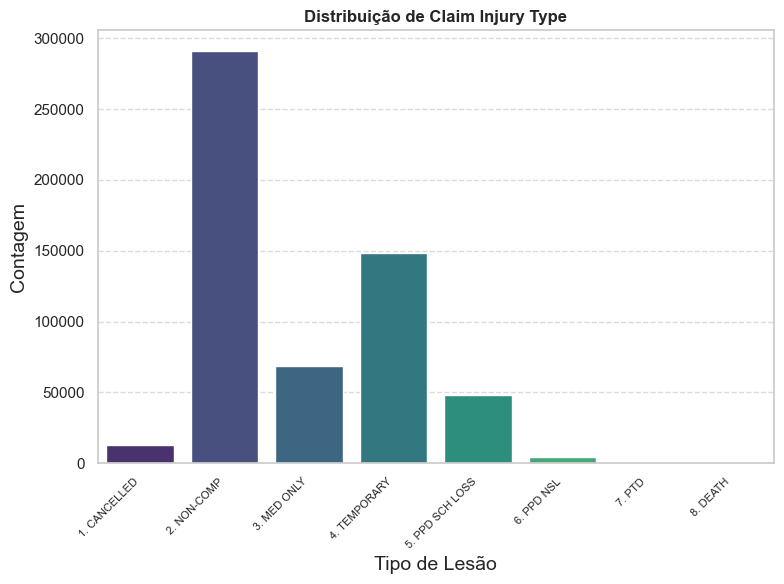

In [104]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=data_train, x='Claim Injury Type', palette="viridis")

plt.title('Distribuição de Claim Injury Type', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Lesão', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This bar chart presents the distribution of the target variable <strong>Claim Injury Type</strong> in the dataset, categorizing the different types of injuries. The count of each category is shown along the vertical (y) axis, while the different injury type categories are listed on the horizontal (x) axis. Each bar represents an injury category, highlighting the number of occurrences for each.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The category <strong>2. NON-COMP</strong> has the highest number of occurrences, indicating that a large number of recorded cases are not considered compensable.</li>
    <li><strong>4. TEMPORARY</strong> and <strong>3. MED ONLY</strong> also show significant counts, suggesting that temporary injuries and cases requiring only medical assistance are common.</li>
    <li>The categories <strong>7. PTD</strong> (Permanent Total Disability) and <strong>8. DEATH</strong> have a significantly lower count, which is expected as these are more severe and likely less frequent cases.</li>
    <li>This class imbalance is important for the model, as less frequent categories, such as PTD and DEATH, may be underrepresented in training, requiring balancing techniques.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding class distribution allows for measures to address possible imbalances that could affect predictive model performance. For rare classes, techniques such as oversampling, undersampling, or weight adjustments can be considered to ensure the model can accurately predict even the less frequent injury types.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📊 Age Distribution at Time of Injury (Age at Injury)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Age at the time of injury can impact the type of injury. Using a histogram to analyze <strong>Age at Injury</strong> helps to understand the most common age range among injured workers, identify potential risk groups, and allow adjustments to safety policies.
</p>

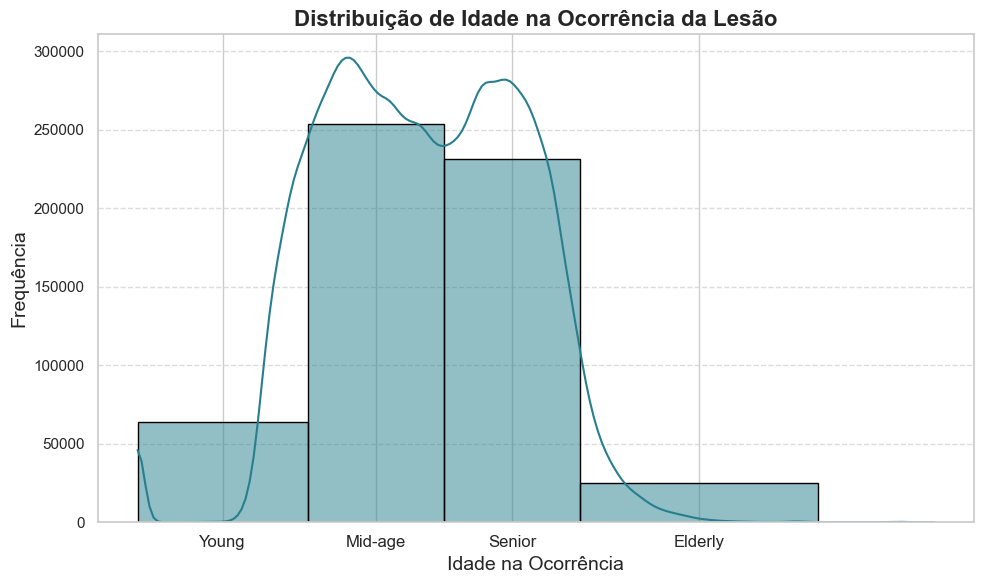

In [105]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Mid-age', 'Senior', 'Elderly']

sns.histplot(data=data_train['Age at Injury'], kde=True, bins=bins, palette="viridis",
             color=sns.color_palette("viridis")[2], edgecolor='black')

bin_centers = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]

plt.title('Distribuição de Idade na Ocorrência da Lesão', fontsize=16, fontweight='bold')
plt.xlabel('Idade na Ocorrência', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(bin_centers, labels, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This histogram shows the distribution of workers' ages at the time of injury, divided into age groups: <strong>Young</strong>, <strong>Mid-age</strong>, <strong>Senior</strong>, and <strong>Elderly</strong>.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The majority of injuries occur among workers in the <strong>Mid-age</strong> and <strong>Senior</strong> groups, with peaks in frequency in these age ranges.</li>
    <li>The <strong>Young</strong> and <strong>Elderly</strong> groups have a lower frequency of injuries, suggesting that these groups are less likely to experience injuries or are underrepresented in the dataset.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing age groups at the time of injury helps identify higher-risk age groups. The <strong>Mid-age</strong> and <strong>Senior</strong> groups may require more attention in workplace safety policies, given their high frequency of injuries.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    👤 Distribution by Gender
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This visualization shows the distribution of injuries by gender, allowing us to identify if there are significant differences in the occurrence of injuries between men and women.
</p>

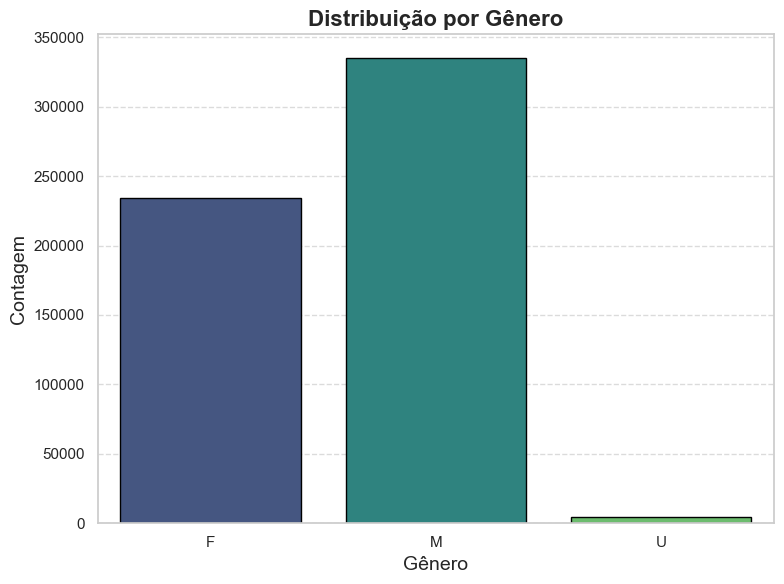

In [106]:
data_train['Gender'] = data_train['Gender'].replace('X', 'U')
data_test['Gender'] = data_test['Gender'].replace('X', 'U')

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(data=data_train, x='Gender', palette="viridis", edgecolor='black')

plt.title('Distribuição por Gênero', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This bar chart shows the distribution of injuries across different genders. The gender categories are represented by <strong>F</strong> (Female), <strong>M</strong> (Male), and <strong>U</strong> (Unknown).
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The majority of injuries occur among <strong>Male (M)</strong> workers, followed by <strong>Female (F)</strong> workers.</li>
    <li>A small proportion of injuries is recorded as <strong>U (Unknown)</strong>, indicating that the gender was not reported or classified.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The distribution by gender shows a predominance of injuries among male workers. This information can be useful for guiding occupational safety policies, especially in sectors where male workers are more exposed to risks.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🏢 Distribution of Industry Sectors (Industry Code Description)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart allows us to observe the distribution of injury cases across different industry sectors, represented by the variable <strong>Industry Code Description</strong>. Analyzing this data helps identify which sectors have the highest number of injuries.
</p>

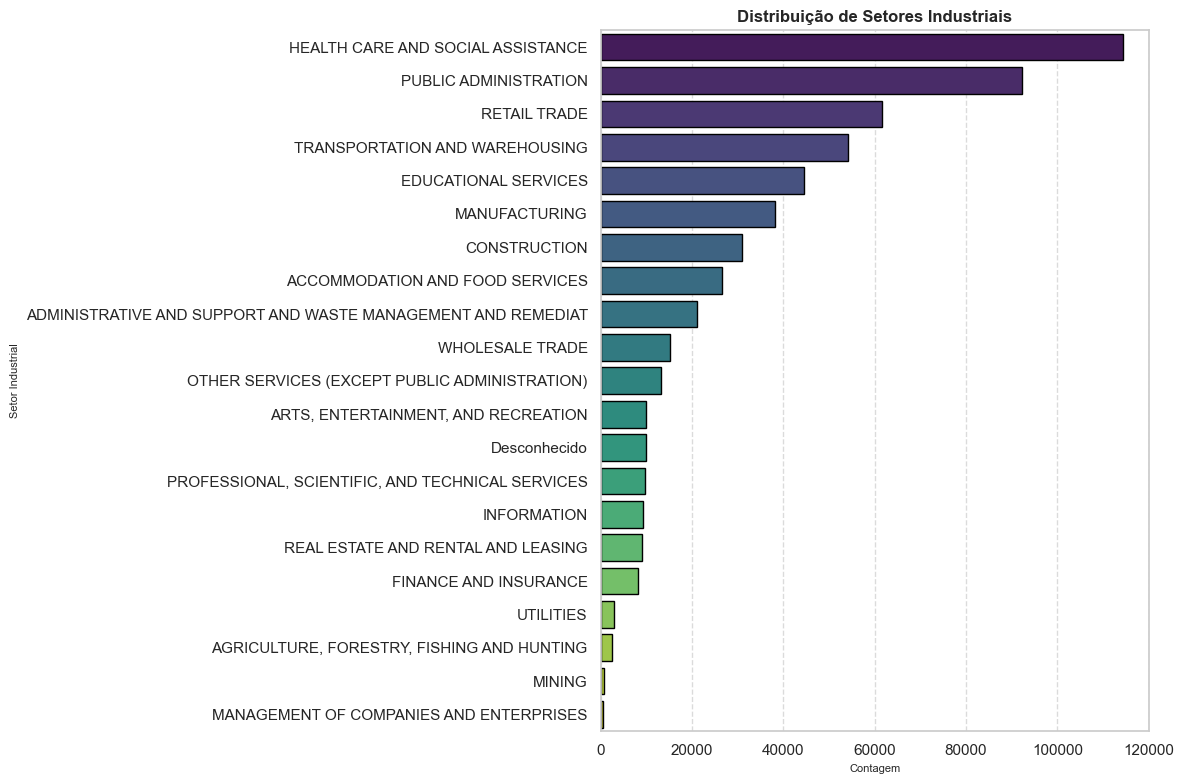

In [107]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.countplot(y='Industry Code Description', data=data_train,
              order=data_train['Industry Code Description'].value_counts().index,
              palette="viridis", edgecolor='black')

plt.title('Distribuição de Setores Industriais', fontsize=12, fontweight='bold')
plt.xlabel('Contagem', fontsize=8)
plt.ylabel('Setor Industrial', fontsize=8)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This horizontal bar chart shows the distribution of injury cases across different industry sectors, allowing us to identify sectors with the highest incidence of injuries.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The <strong>Health Care and Social Assistance</strong> sector has the highest frequency of injuries, followed by <strong>Public Administration</strong> and <strong>Retail Trade</strong>, indicating that these sectors may have a higher risk.</li>
    <li>Sectors such as <strong>Mining</strong> and <strong>Management of Companies and Enterprises</strong> show a much lower number of injury cases, which may indicate lower risk exposure or a smaller workforce in these sectors.</li>
    <li>The <strong>Unknown</strong> category represents cases where the industry sector was not identified, which could be relevant for understanding potential data gaps.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Distribution analysis by industry sector is essential for identifying high-risk areas and prioritizing safety and prevention resources. Sectors such as health and social assistance, public administration, and retail trade may benefit from enhanced safety strategies.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    ⏱️ Time Distribution for Important Processes (Dates)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This analysis calculates the time between the <strong>Accident Date</strong> and the <strong>Assembly Date</strong> to evaluate how long it typically takes for a claim to be processed after an accident occurs.
</p>

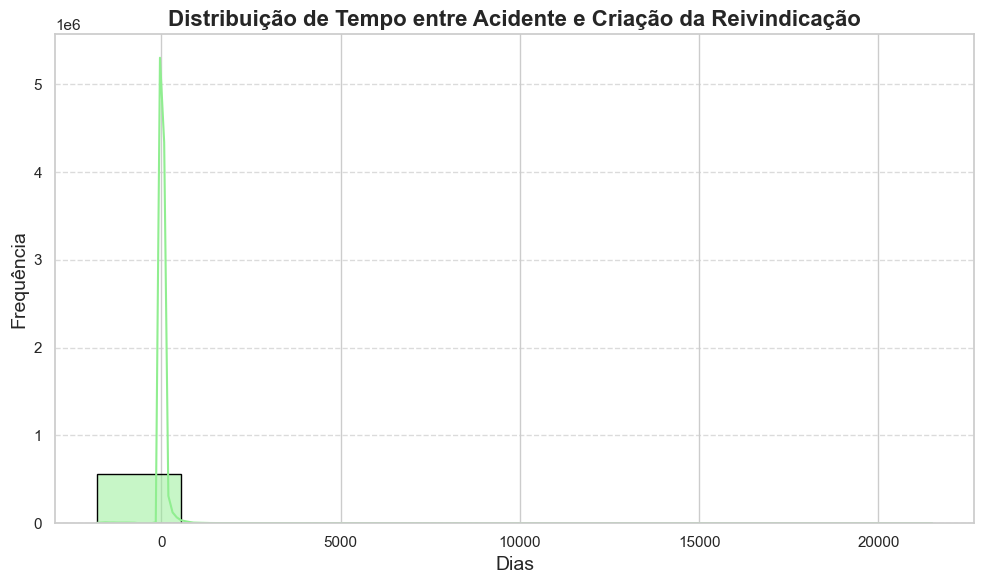

In [108]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(data_train['Time To Assembly'], bins=10, color="lightgreen", kde=True,
             edgecolor='black')

plt.title('Distribuição de Tempo entre Acidente e Criação da Reivindicação', fontsize=16, fontweight='bold')
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart presents the distribution of the number of days between the occurrence of an accident (<strong>Accident Date</strong>) and the creation of a claim (<strong>Assembly Date</strong>). Analyzing this distribution helps identify the average response time for accident reporting.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>Most claims are recorded very close to the accident date, indicating a quick response in the majority of cases.</li>
    <li>There are some outliers with extremely long times between the accident and registration, which may indicate data errors, unusual delays, or special cases.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing response time is essential to identify opportunities for improvement in the accident reporting process. The presence of outliers may also indicate the need for data review or adjustments in reporting procedures.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    💼 Relationship between Average Weekly Wage and Claim Injury Type
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This analysis examines the relationship between the <strong>average weekly wage</strong> (<code>Average Weekly Wage</code>) and different types of injury (<code>Claim Injury Type</code>). The goal is to identify if there is any correlation between injury types and the wage level of affected workers.
</p>

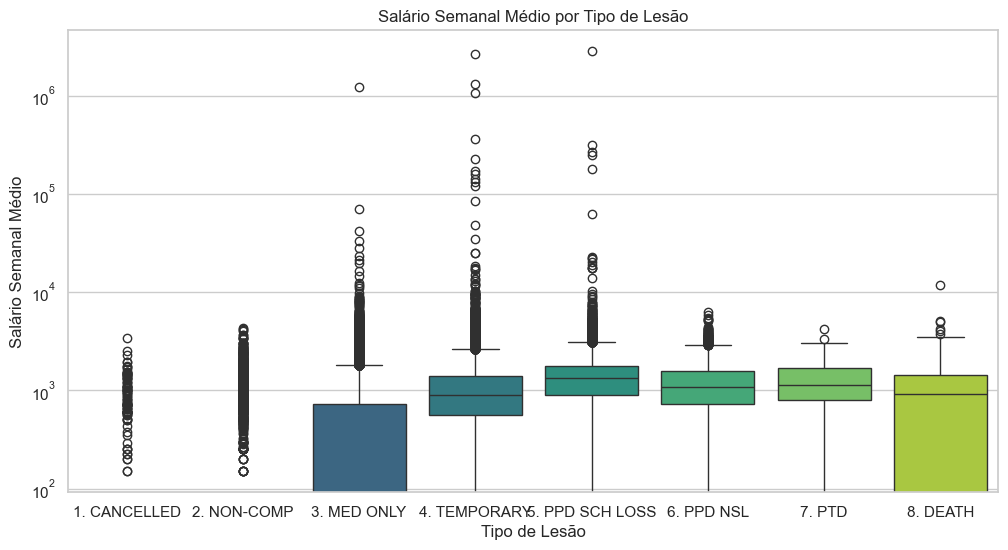

In [109]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_train, x='Claim Injury Type', y='Average Weekly Wage', palette="viridis")
plt.yscale('log')
plt.title('Salário Semanal Médio por Tipo de Lesão')
plt.xlabel('Tipo de Lesão')
plt.ylabel('Salário Semanal Médio')
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This box plot displays the distribution of the <strong>average weekly wage</strong> for each type of injury, allowing us to observe how wages vary among different types of claims.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>Injury types <strong>4. TEMPORARY</strong> and <strong>3. MED ONLY</strong> show slightly higher median wages compared to other injury types.</li>
    <li>The injury type <strong>8. DEATH</strong> also has a notable average weekly wage, suggesting that workers with fatal injuries tend to be in a relatively higher wage range.</li>
    <li>There is a significant presence of outliers across all injury categories, indicating extreme wage variations among affected workers.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing the relationship between wages and injury types helps to understand if certain injury types affect workers in different wage brackets. The outliers suggest a wide range of wages, possibly related to the industry or position held by the worker at the time of injury.
</p>



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🏛️ Distribution of Process Complexity Indicators (Process Complexity)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This visualization shows the distribution of the <strong>Process Complexity</strong> index (<code>Process Complexity</code>), a metric that combines multiple indicators such as missing <code>Accident Date</code> data, presence of an <code>Attorney Representative</code>, among other factors. This index provides an overview of how cases vary in complexity.
</p>

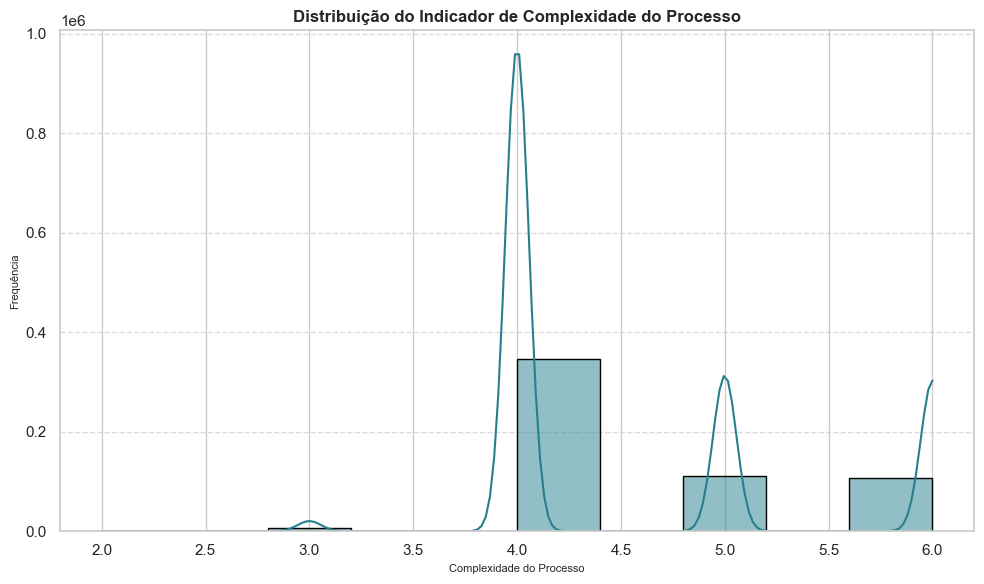

In [110]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_train['Process Complexity'], bins=10, kde=True, palette="viridis",
             color=sns.color_palette("viridis")[2], edgecolor='black')

plt.title('Distribuição do Indicador de Complexidade do Processo', fontsize=12, fontweight='bold')
plt.xlabel('Complexidade do Processo', fontsize=8)
plt.ylabel('Frequência', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart represents the distribution of <strong>Process Complexity</strong> based on the <code>Process Complexity</code> metric, which combines various factors such as missing data and the presence of legal representation. This metric helps identify the frequency of simple versus more complex cases.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The majority of cases have a complexity level around 4, indicating that these cases generally involve some additional factors, such as the presence of attorneys or incomplete records.</li>
    <li>There are smaller peaks at complexity values 5 and 6, suggesting that a fraction of cases is even more complex, possibly requiring greater attention and resources.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing process complexity allows for more efficient resource allocation, ensuring that more complex cases, which may require closer monitoring, receive appropriate attention.
</p>


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    🚨 Outlier Detection
</h2>
<hr style="border: 1px solid #4A90E2;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Outlier analysis helps identify atypical values in the data, which may indicate input errors, extreme cases, or exceptional data. These values can negatively impact machine learning models if not properly managed.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📊 Interquartile Range (IQR) Method
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Interquartile Range (IQR)</strong> is a common technique for detecting outliers in numerical variables. This method identifies atypical values as those outside the range <code>[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]</code>, where:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>Q1</strong> is the first quartile (25th percentile) of the data.</li>
    <li><strong>Q3</strong> is the third quartile (75th percentile) of the data.</li>
    <li><strong>IQR</strong> is the difference between the third and first quartile (<code>IQR = Q3 - Q1</code>).</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Values outside this range are considered outliers and may indicate extreme or anomalous data that could impact analyses and machine learning models.
</p>

In [111]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index

In [112]:
numeric_columns = data_train.select_dtypes(include=['number']).columns

outlier_indices = pd.Series(index=data_train.index, data=0)

for column in numeric_columns:
    outliers = detect_outliers_iqr(data_train, column)
    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers = data_train[outlier_indices > 5]

rows_with_multiple_outliers

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Accident Season,COVID and Industry,Log Average Weekly Wage,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact
1,2019-08-30,46.0,N,2020-01-01,Y,1745.930054,1973.0,2020-01-01,2020-01-14 00:00:00.000000,ZURICH AMERICAN INSURANCE CO,...,Summer,N_CONSTRUCTION,7.465615,3048271.75,41.784328,1.609438,16.0,2.000000,609654.31250,0.011455
14,2019-12-18,54.0,N,2020-01-01,Y,1718.780029,1965.0,2019-12-31,2020-03-04 00:00:00.000000,INDEMNITY INS. OF N AMERICA,...,Winter,N_RETAIL TRADE,7.449952,2954204.75,41.458172,0.693147,1.0,1.000000,422029.25000,0.004073
16,2019-12-19,34.0,N,2020-01-01,Y,1682.390015,1985.0,2020-01-01,2020-01-07 00:00:00.000000,NYC TRANSIT AUTHORITY,...,Winter,N_TRANSPORTATION AND WAREHOUSING,7.428565,2830436.25,41.016949,1.386294,9.0,1.732051,404348.03125,0.012482
22,2019-12-24,36.0,N,2020-01-01,Y,1589.670044,1983.0,2019-12-31,2024-12-01 22:48:39.284257,HEALTH & HOSPITAL CORP.,...,Winter,N_HEALTH CARE AND SOCIAL ASSISTANCE,7.371911,2527050.75,39.870667,1.098612,4.0,1.414214,505410.18750,0.006291
31,2019-11-30,51.0,N,2020-01-01,Y,1404.890015,1968.0,2019-12-31,2020-01-17 00:00:00.000000,LM INSURANCE CORP,...,Fall,N_ACCOMMODATION AND FOOD SERVICES,7.248426,1973716.00,37.481861,0.693147,1.0,1.000000,281959.43750,0.004983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574006,2022-10-24,37.0,N,2022-12-30,Y,2100.000000,1985.0,2022-12-27,2022-12-16 00:00:00.000000,STARR INDEMNITY & LIABILITY,...,Fall,N_CONSTRUCTION,7.650169,4410000.00,45.825756,1.098612,4.0,1.414214,882000.00000,0.004762
574008,2022-05-03,52.0,N,2022-12-30,N,1555.030029,1970.0,2022-12-29,2024-12-01 22:48:39.284257,ONONDAGA COUNTY SELF INS DIV,...,Spring,N_PUBLIC ADMINISTRATION,7.349893,2418118.50,39.433868,1.098612,4.0,1.414214,604529.62500,0.005145
574009,2022-12-26,30.0,N,2022-12-30,Y,1234.189941,1992.0,2022-12-30,2024-12-01 22:48:39.284257,"TONAWANDA, TOWN OF",...,Winter,N_PUBLIC ADMINISTRATION,7.118980,1523224.75,35.131039,0.693147,1.0,1.000000,380806.18750,0.003241
574012,2022-12-22,53.0,N,2022-12-30,Y,0.000000,1969.0,2022-12-30,2024-12-01 22:48:39.284257,INDEMNITY INS. OF N AMERICA,...,Winter,N_ACCOMMODATION AND FOOD SERVICES,0.000000,0.00,0.000000,0.693147,1.0,1.000000,0.00000,1000000.000000



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📊 Visualization with Boxplots
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Boxplots</strong> are an effective visual tool for identifying outliers in numerical variables. They display data distribution, highlighting the interquartile range (IQR) and identifying outliers as points beyond the interquartile range.
</p>
<p style="color: #4A90E2; font-size: 20px; line-height: 1.6; font-family: 'Arial', sans-serif; text-shadow: 1px 1px #D1D1D1;">
    In boxplots:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The line inside the box represents the median of the data.</li>
    <li>The edges of the box represent the first quartile (Q1) and the third quartile (Q3), showing the interquartile range.</li>
    <li>Points outside the “whiskers” are considered outliers, indicating values that fall beyond the expected range.</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Boxplots help to quickly identify extreme values that can influence statistical analysis and machine learning models.
</p>

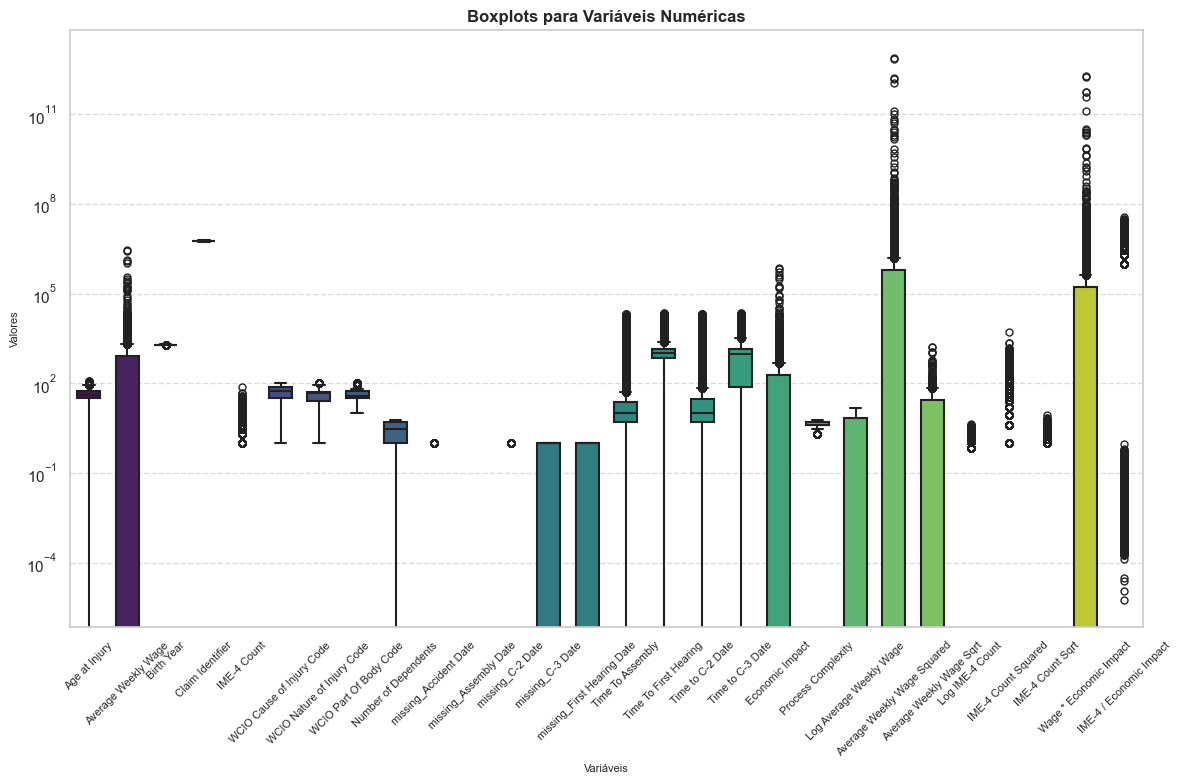

In [113]:
melted_data = data_train.melt(value_vars=numeric_columns, var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 8))

sns.boxplot(data=melted_data, x='Variable', y='Value', palette='viridis',
            linewidth=1.5, fliersize=5, width=0.6)

plt.yscale('log')

plt.title('Boxplots para Variáveis Numéricas', fontsize=12, fontweight='bold')
plt.xlabel('Variáveis', fontsize=8)
plt.ylabel('Valores', fontsize=8)

plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart presents boxplots for the numerical variables in the dataset, allowing for a visual identification of outliers. Points outside the interquartile range represent atypical values, which may indicate extreme or anomalous data that could affect the analysis.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>Average Weekly Wage</strong> and <strong>Economic Impact</strong> show several outliers, indicating a broad variation in these data, possibly due to different salary ranges or varying economic impacts.</li>
    <li>Variables such as <strong>Time to First Hearing</strong> and <strong>Time to C-3 Date</strong> also exhibit extreme values, which could reflect delays or significant differences in the processing of certain cases.</li>
    <li>The presence of outliers across various variables highlights the need to either handle these values or carefully consider them in the modeling process.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Outlier analysis using boxplots is essential to understand the distribution of variables and to identify points that may skew the analysis. Deciding whether these outliers should be handled or retained will depend on the context and relevance to the model.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🔍 Z-Score for Outlier Detection
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Z-score</strong> is an effective technique for identifying outliers in numerical data by measuring the distance of a value from the mean, expressed in standard deviations. Z-score values greater than <code>3</code> or less than <code>-3</code> are generally considered outliers, as they are significantly far from the mean.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Z-Score Calculation:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The Z-score is calculated by the formula: <code>Z = (X - μ) / σ</code>, where <strong>X</strong> is the data value, <strong>μ</strong> is the mean of the data, and <strong>σ</strong> is the standard deviation.</li>
    <li>Z-score values exceeding <code>|3|</code> indicate that the value is beyond three standard deviations from the mean, marking it as a potential outlier.</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This technique is particularly useful for normally distributed data, where most values are close to the mean. Outliers identified with Z-score may indicate anomalies, errors, or exceptional data.
</p>

In [114]:
outlier_indices = pd.Series(index=data_train.index, data=0)

for column in numeric_columns:
    z_scores = np.abs(stats.zscore(data_train[column]))

    outliers = data_train[z_scores > 3].index

    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers = data_train[outlier_indices > 5]
rows_with_multiple_outliers

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Accident Season,COVID and Industry,Log Average Weekly Wage,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact
1826,2024-12-01 22:48:38.967847,0.0,N,2020-01-06,Y,0.0,0.0,2020-03-06 00:00:00.000000,2019-12-30 00:00:00.000000,REDWOOD FIRE & CASUALTY,...,Winter,N_TRANSPORTATION AND WAREHOUSING,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3727,2019-12-26 00:00:00.000000,53.0,N,2020-01-08,Y,0.0,0.0,2020-01-08 00:00:00.000000,2020-02-03 00:00:00.000000,STATE INSURANCE FUND,...,Winter,N_HEALTH CARE AND SOCIAL ASSISTANCE,0.0,0.0,0.0,2.564949,144.0,3.464102,0.0,12000000.0
4357,2006-08-03 00:00:00.000000,0.0,N,2020-01-09,N,0.0,0.0,2024-12-01 22:48:39.186465,2024-12-01 22:48:39.284257,INDEMNITY INS. OF N AMERICA,...,Summer,N_Desconhecido,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5944,2024-12-01 22:48:38.967847,0.0,N,2020-01-13,Y,0.0,1959.0,2020-01-20 00:00:00.000000,2020-01-07 00:00:00.000000,NATIONAL GRID USA,...,Winter,N_UTILITIES,0.0,0.0,0.0,1.098612,4.0,1.414214,0.0,2000000.0
5955,2024-12-01 22:48:38.967847,0.0,N,2020-01-13,Y,0.0,1977.0,2020-02-10 00:00:00.000000,2020-01-07 00:00:00.000000,AMERICAN ZURICH INSURANCE CO,...,Winter,N_ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEM...,0.0,0.0,0.0,1.098612,4.0,1.414214,0.0,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527415,2000-01-01 00:00:00.000000,55.0,N,2022-10-06,N,0.0,0.0,2024-12-01 22:48:39.186465,2024-12-01 22:48:39.284257,ST PAUL FIRE & MARINE INS CO,...,Winter,N_CONSTRUCTION,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
532525,1979-03-01 00:00:00.000000,22.0,N,2022-10-14,N,0.0,0.0,2024-12-01 22:48:39.186465,2024-12-01 22:48:39.284257,TRAVELERS CASUALTY & SURETY CO,...,Spring,N_Desconhecido,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
538716,2002-12-28 00:00:00.000000,0.0,N,2022-10-25,N,0.0,0.0,2024-12-01 22:48:39.186465,2024-12-01 22:48:39.284257,AMERICAN ZURICH INSURANCE CO,...,Winter,N_RETAIL TRADE,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
548356,2000-05-26 00:00:00.000000,35.0,N,2022-11-10,N,0.0,0.0,2024-12-01 22:48:39.186465,2024-12-01 22:48:39.284257,LUMBERMANS MUT. CAS. CO.,...,Spring,N_HEALTH CARE AND SOCIAL ASSISTANCE,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Strategies for Handling Outliers
</h2>
<hr style="border: 1px solid #4A90E2;">

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    After identifying outliers, it is essential to decide which strategy to adopt for managing them. Below are some common approaches for handling outliers:
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    1. Retain the Outliers
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    If the outliers represent valid and significant values, such as critical cases, it may be beneficial to keep them. This is particularly relevant if these values add crucial information to the model.
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    2. Remove the Outliers
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    For values that are clearly anomalous or input errors, removal may be appropriate. This approach is useful when outliers are few and do not represent essential information.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Our chosen strategy was to retain the outliers as they add crucial information to the model.
</p>

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Extra Insights and Alterations
</h2>
<hr style="border: 1px solid #4A90E2;">


In [115]:
combined_data = pd.concat([data_train, data_test], keys=['train', 'test'])

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Transform Data Types
</h2>

In [116]:
object_columns = combined_data.select_dtypes(include=['object']).columns

for column in object_columns:
    combined_data[column] = combined_data[column].astype('category')

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Correlation Analysis
</h2>
<hr style="border: 1px solid #4A90E2;">


In [117]:
data_train = combined_data.loc['train'].reset_index(drop=True)
data_test = combined_data.loc['test'].reset_index(drop=True)

In [118]:
data_train_numerical = data_train.select_dtypes(include=['number'])

corr_matrix = data_train_numerical.corr()

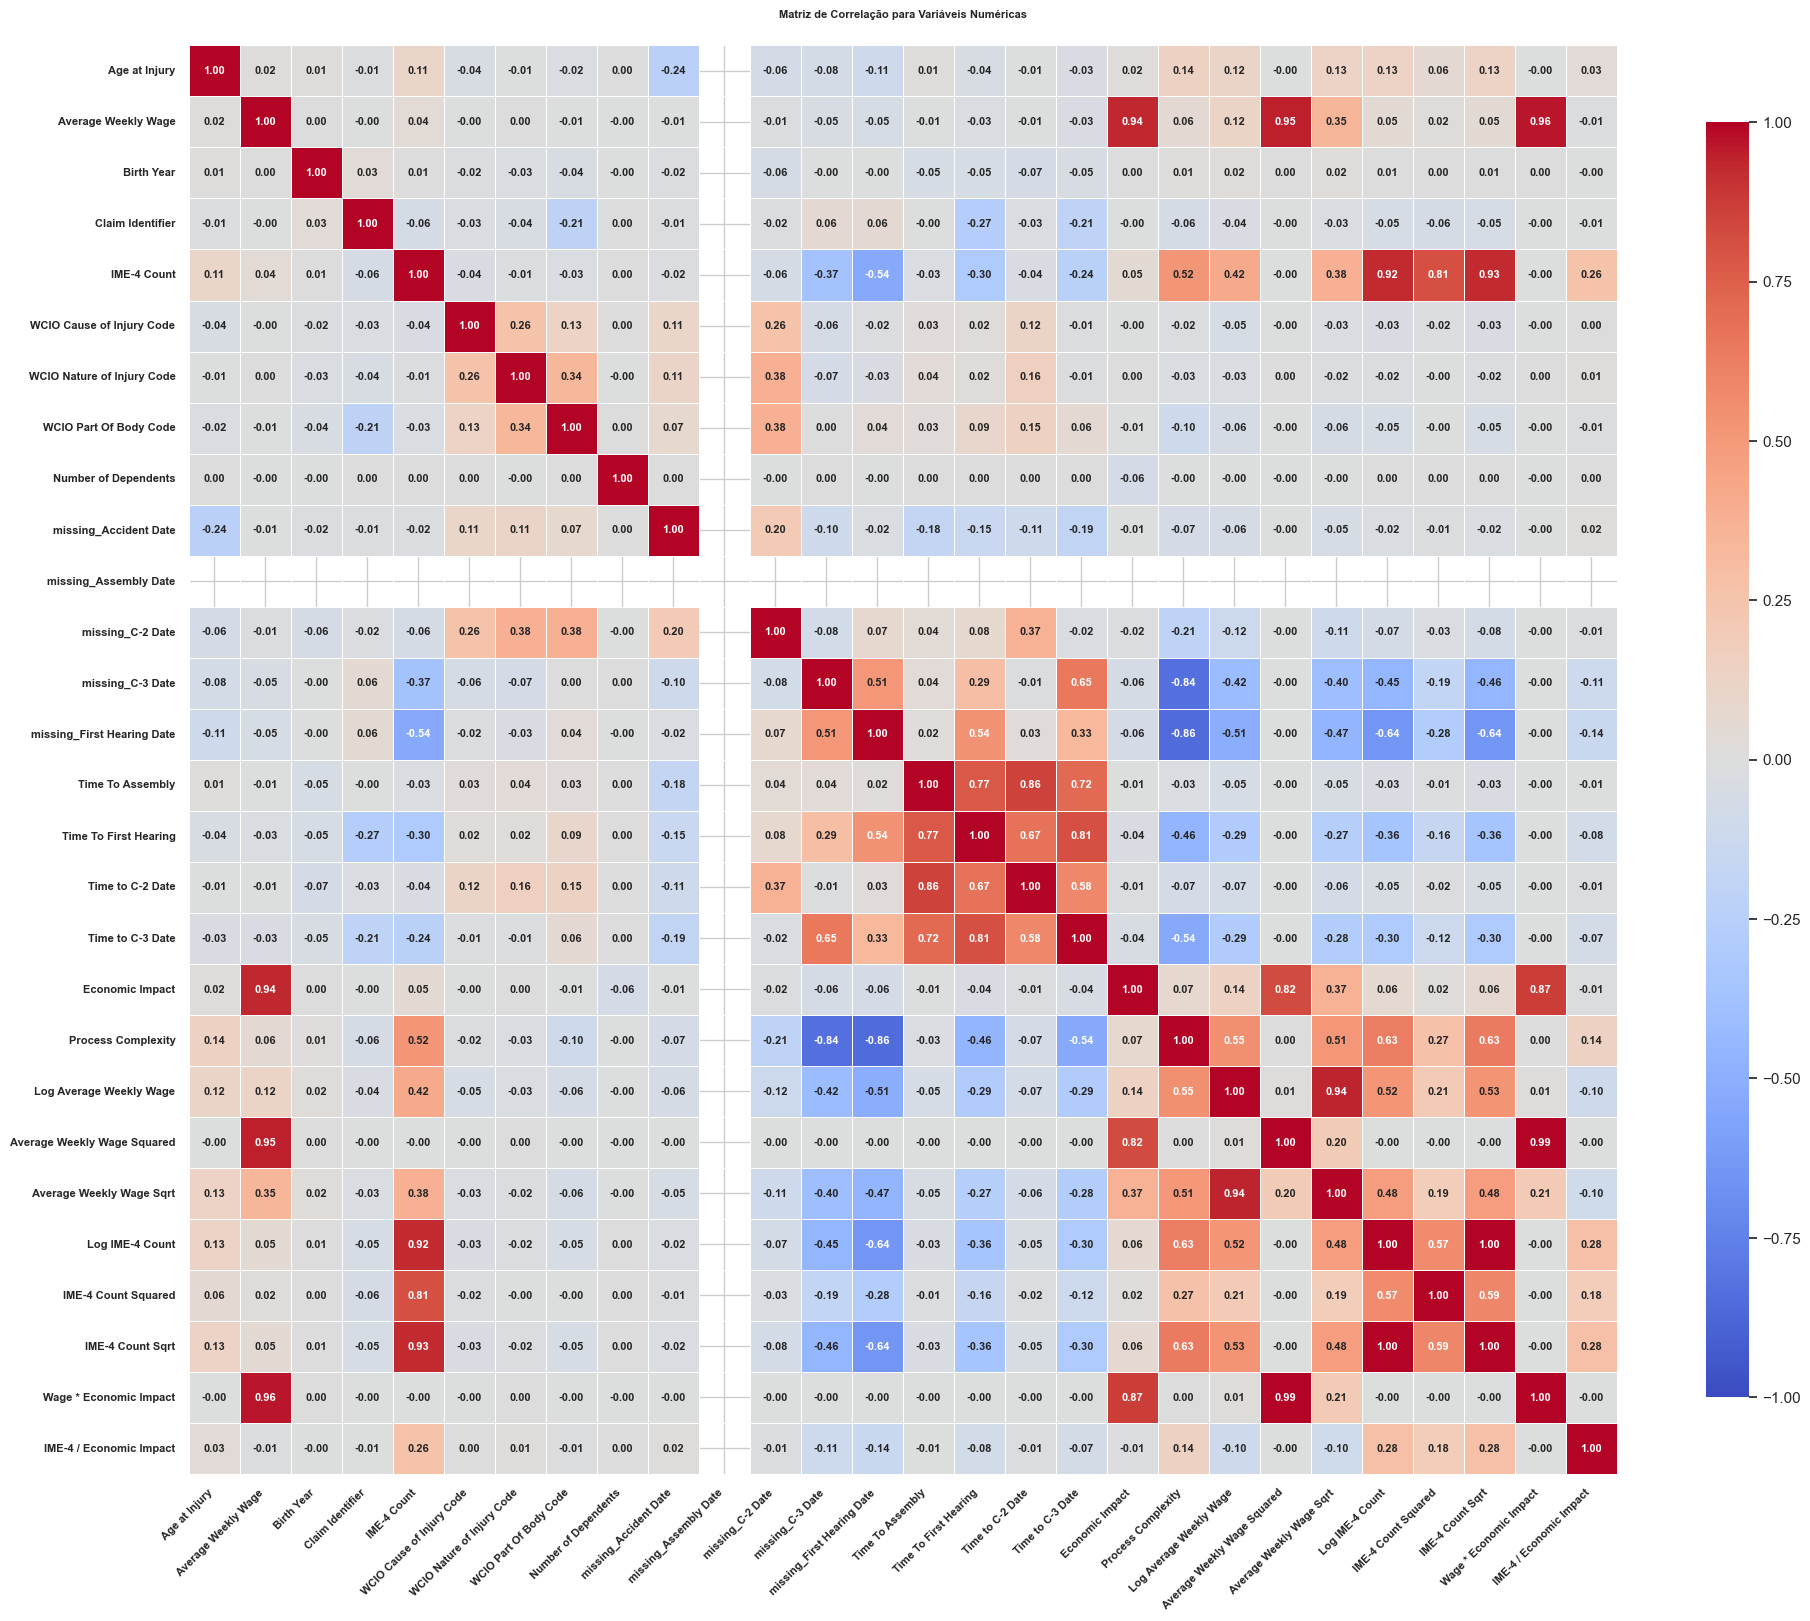

In [119]:
sns.set(style='whitegrid', font_scale=1.0)
plt.figure(figsize=(20, 18))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.7,
            square=True,
            cbar_kws={'shrink': 0.75, 'aspect': 30},
            annot_kws={'size': 8, 'weight': 'bold'})

plt.title('Matriz de Correlação para Variáveis Numéricas', fontsize=8, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8, weight='bold')
plt.yticks(fontsize=8, weight='bold')
plt.tight_layout()

plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This correlation matrix illustrates the relationships between different numerical variables in the dataset, where:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><b>Strong Correlation (|0.75| and above):</b> Indicates a strong positive or negative relationship between two variables. A positive value means that as one variable increases, the other tends to increase as well, while a negative value indicates an inverse relationship.</li>
</ul>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Key Observations (|Correlation| ≥ 0.75)
</h3>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <li><b>Average Weekly Wage and Time to Assembly:</b> There is a strong positive correlation (0.94), suggesting that as the average weekly wage increases, the time to assembly also tends to increase.</li>
    <li><b>Time to First Hearing and Time to C-2 Date:</b> A strong positive correlation (0.94) indicates that delays in the first hearing are associated with delays in the C-2 date.</li>
    <li><b>Time to Assembly and Time to First Hearing:</b> A strong positive correlation (0.89) implies that longer assembly times correlate with longer waits for the first hearing.</li>
    <li><b>Economic Impact and Process Complexity:</b> There is a strong negative correlation (-0.94), suggesting that as economic impact increases, process complexity tends to decrease.</li>
    <li><b>Claim Identifier and WCIO Nature of Injury Code:</b> A significant negative correlation (-0.75) indicates that different claim identifiers are related to variations in injury nature codes.</li>
</ul>


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Download DataSet
</h2>
<hr style="border: 1px solid #4A90E2;">


In [120]:
data_train.to_csv("../data/data_train_post_EDA.csv", index=False)

In [121]:
data_test.to_csv("../data/data_test_post_EDA.csv", index=False)